# 1. Importing Libraries

In [1]:
pip install pyprocessmacro

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:

import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
# Set English font and style
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")

import statsmodels.api as sm
import statsmodels.formula.api as smf
pd.set_option('display.float_format', lambda x: '{:.4f}'.format(x))


from pyprocessmacro import Process

# 2. Data Preprocessing

In [3]:
df = pd.read_csv('/kaggle/input/social-media-and-mental-health/smmh.csv')

In [4]:
df.head()

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0000,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0000,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0000,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0000,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0000,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


In [ ]:

df.isnull().sum()

Timestamp                                                                                                                0
1. What is your age?                                                                                                     0
2. Gender                                                                                                                0
3. Relationship Status                                                                                                   0
4. Occupation Status                                                                                                     0
5. What type of organizations are you affiliated with?                                                                  30
6. Do you use social media?                                                                                              0
7. What social media platforms do you commonly use?                                                                      0
8. What is the a

In [ ]:

df['5. What type of organizations are you affiliated with?'] = df['5. What type of organizations are you affiliated with?'].fillna(df['5. What type of organizations are you affiliated with?'].mode()[0])
df.isnull().sum()

Timestamp                                                                                                               0
1. What is your age?                                                                                                    0
2. Gender                                                                                                               0
3. Relationship Status                                                                                                  0
4. Occupation Status                                                                                                    0
5. What type of organizations are you affiliated with?                                                                  0
6. Do you use social media?                                                                                             0
7. What social media platforms do you commonly use?                                                                     0
8. What is the average t

In [ ]:

df.drop('Timestamp', axis = 1, inplace = True)
df.head()

,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,10. How often do you get distracted by Social media when you are busy doing something?,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,21.0000,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,2,5,2,5,2,3,2,5,4,5
1,21.0000,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,2,4,5,4,5,1,1,5,4,5
2,21.0000,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,1,2,5,4,3,3,1,4,2,5
3,21.0000,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,2,1,3,5,3,5,1,2,4,3,2
4,21.0000,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,4,5,5,3,3,3,4,4,1


In [ ]:

new_column_names = {
    '1. What is your age?': 'age',
    '2. Gender': 'gender',
    '3. Relationship Status': 'relationship_status',
    '4. Occupation Status': 'occupation_status',
    '5. What type of organizations are you affiliated with?': 'affiliation',
    '6. Do you use social media?': 'social_media_usage',
    '7. What social media platforms do you commonly use?': 'social_media_platforms',
    '8. What is the average time you spend on social media every day?': 'daily_social_media_time',
    '9. How often do you find yourself using Social media without a specific purpose?': 'purposeless_use',
    '10. How often do you get distracted by Social media when you are busy doing something?': 'distraction_by_social_media',
    '11. Do you feel restless if you haven\'t used Social media in a while?': 'restless_without_social_media',
    '12. On a scale of 1 to 5, how easily distracted are you?': 'distraction_score',
    '13. On a scale of 1 to 5, how much are you bothered by worries?': 'worry_score',
    '14. Do you find it difficult to concentrate on things?': 'concentration_difficulty',
    '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?': 'social_comparison',
    '16. Following the previous question, how do you feel about these comparisons, generally speaking?': 'feeling_about_comparisons',
    '17. How often do you look to seek validation from features of social media?': 'seeking_validation',
    '18. How often do you feel depressed or down?': 'depression_score',
    '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?': 'activity_interest',
    '20. On a scale of 1 to 5, how often do you face issues regarding sleep?': 'sleep_issues'
}
df.rename(columns = new_column_names, inplace = True)


df.drop_duplicates(inplace=True)


df.isnull().sum()

age                              0
gender                           0
relationship_status              0
occupation_status                0
affiliation                      0
social_media_usage               0
social_media_platforms           0
daily_social_media_time          0
purposeless_use                  0
distraction_by_social_media      0
restless_without_social_media    0
distraction_score                0
worry_score                      0
concentration_difficulty         0
social_comparison                0
feeling_about_comparisons        0
seeking_validation               0
depression_score                 0
activity_interest                0
sleep_issues                     0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            481 non-null    float64
 1   gender                         481 non-null    object 
 2   relationship_status            481 non-null    object 
 3   occupation_status              481 non-null    object 
 4   affiliation                    481 non-null    object 
 5   social_media_usage             481 non-null    object 
 6   social_media_platforms         481 non-null    object 
 7   daily_social_media_time        481 non-null    object 
 8   purposeless_use                481 non-null    int64  
 9   distraction_by_social_media    481 non-null    int64  
 10  restless_without_social_media  481 non-null    int64  
 11  distraction_score              481 non-null    int64  
 12  worry_score                    481 non-null    int

# 3. Exploratory Data Analysis

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


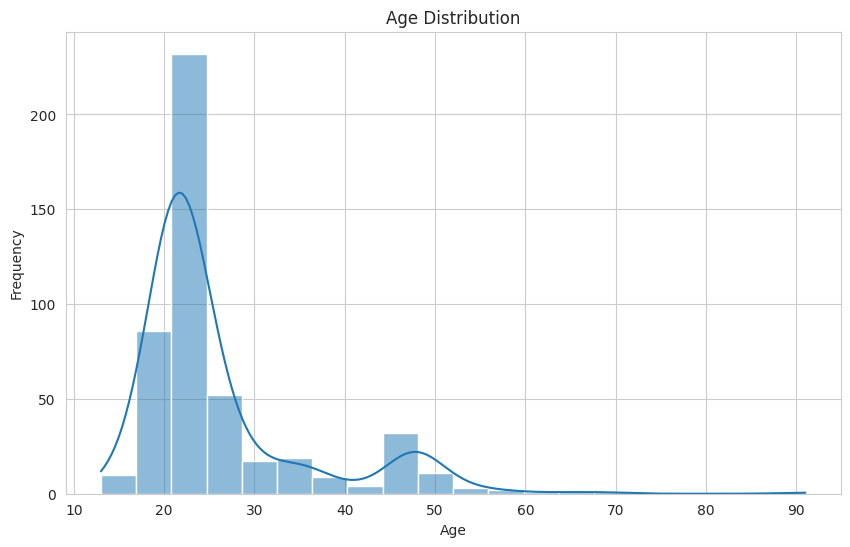

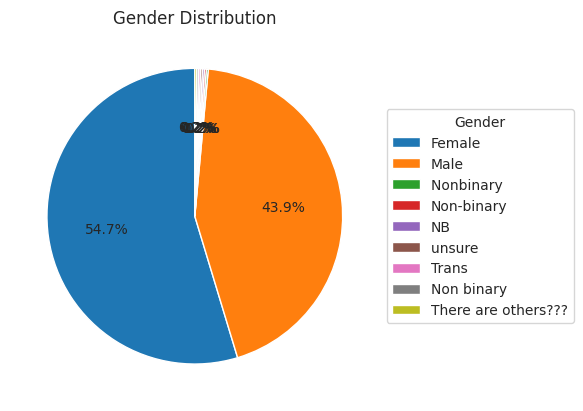

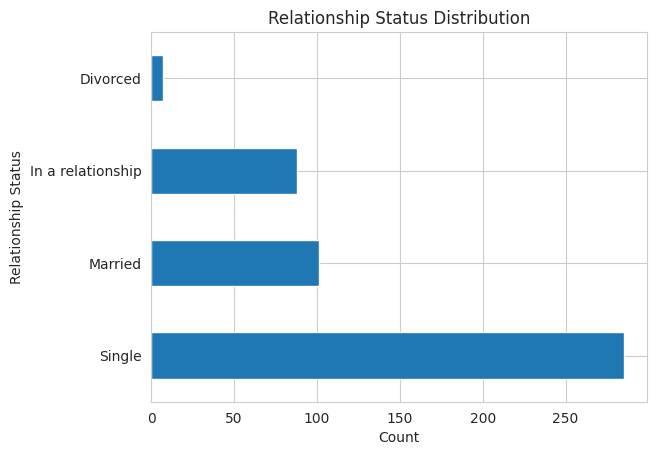

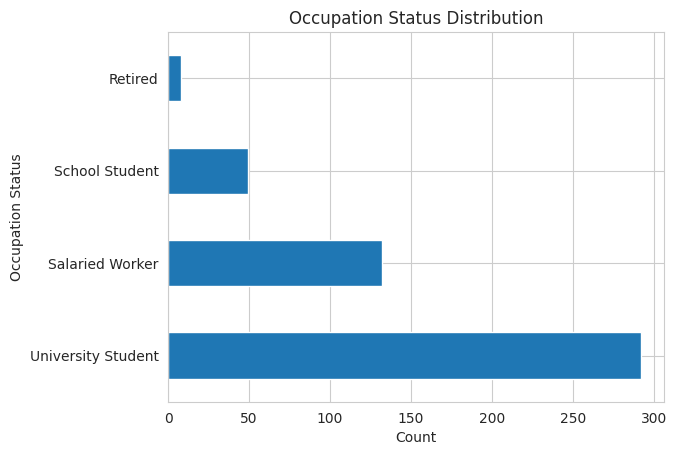

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

gender_counts = df['gender'].value_counts()
plt.pie(gender_counts, labels=None, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.legend(gender_counts.index, title='Gender', bbox_to_anchor=(1, 0.5), loc='center left') 
plt.show()

relationship_counts = df['relationship_status'].value_counts()
relationship_counts.plot(kind='barh')
plt.title('Relationship Status Distribution')
plt.ylabel('Relationship Status')
plt.xlabel('Count')
plt.show()

# Occupation Status
occupation_counts = df['occupation_status'].value_counts()
occupation_counts.plot(kind='barh')
plt.title('Occupation Status Distribution')
plt.ylabel('Occupation Status')
plt.xlabel('Count')
plt.show()

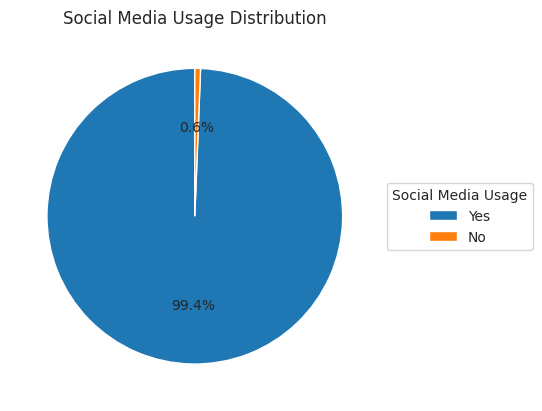

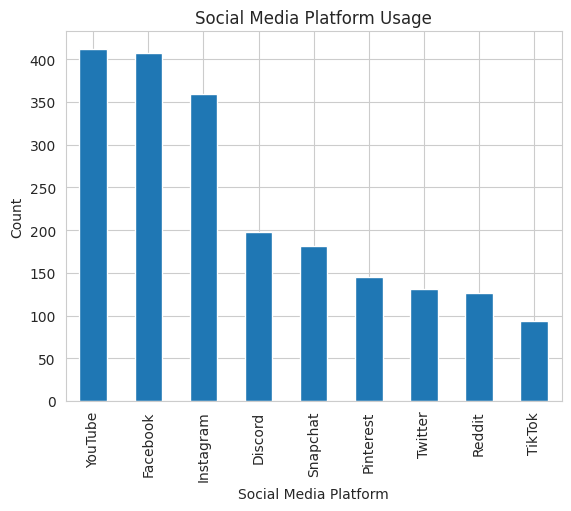

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


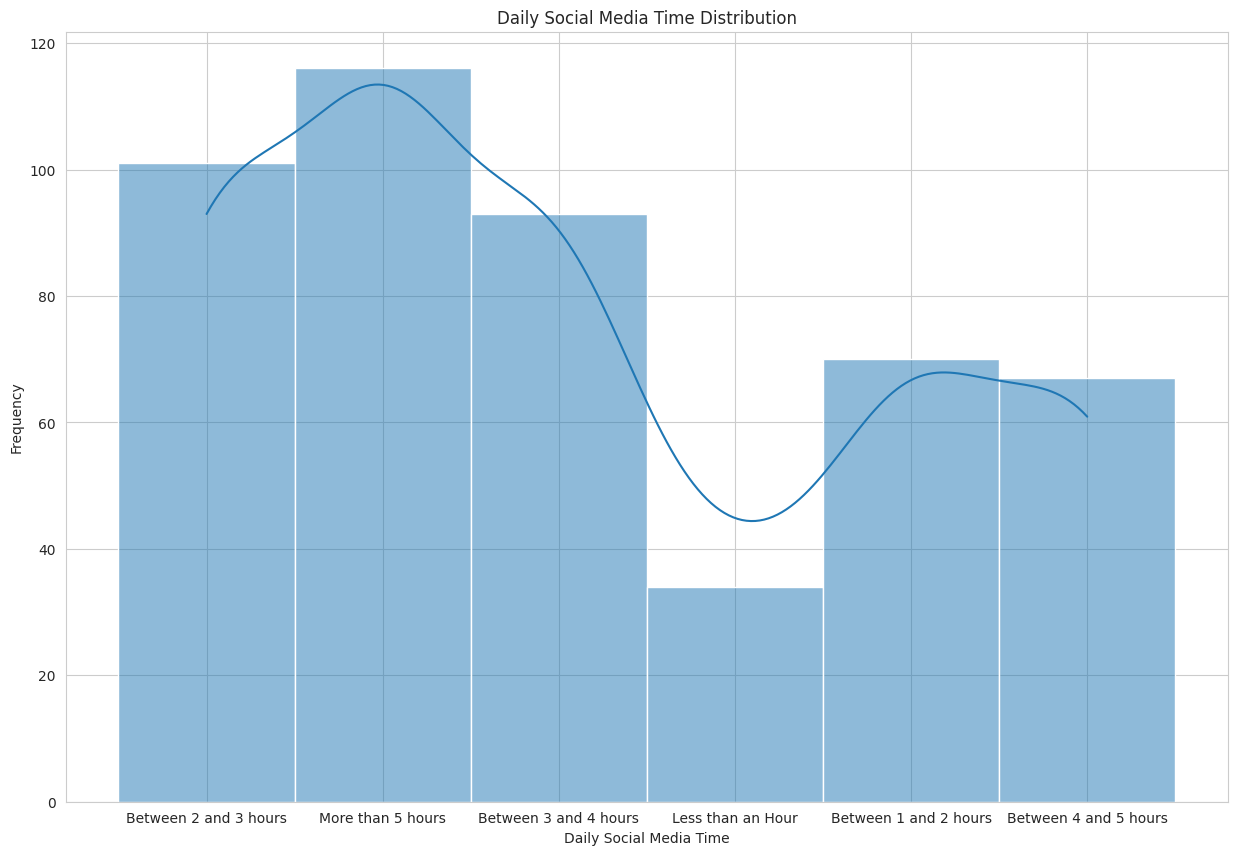

In [ ]:
# Social Media Usage Distribution
social_media_usage_counts = df['social_media_usage'].value_counts()
plt.pie(social_media_usage_counts, labels=None, autopct='%1.1f%%', startangle=90)
plt.title('Social Media Usage Distribution')
plt.legend(social_media_usage_counts.index, title='Social Media Usage', bbox_to_anchor=(1, 0.5), loc='center left') 
plt.show()


platform_counts = df['social_media_platforms'].str.split(', ', expand=True).stack().value_counts()
platform_counts.plot(kind='bar')
plt.title('Social Media Platform Usage')
plt.xlabel('Social Media Platform')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(15, 10))
sns.histplot(df['daily_social_media_time'], bins=20, kde=True)
plt.title('Daily Social Media Time Distribution')
plt.xlabel('Daily Social Media Time')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

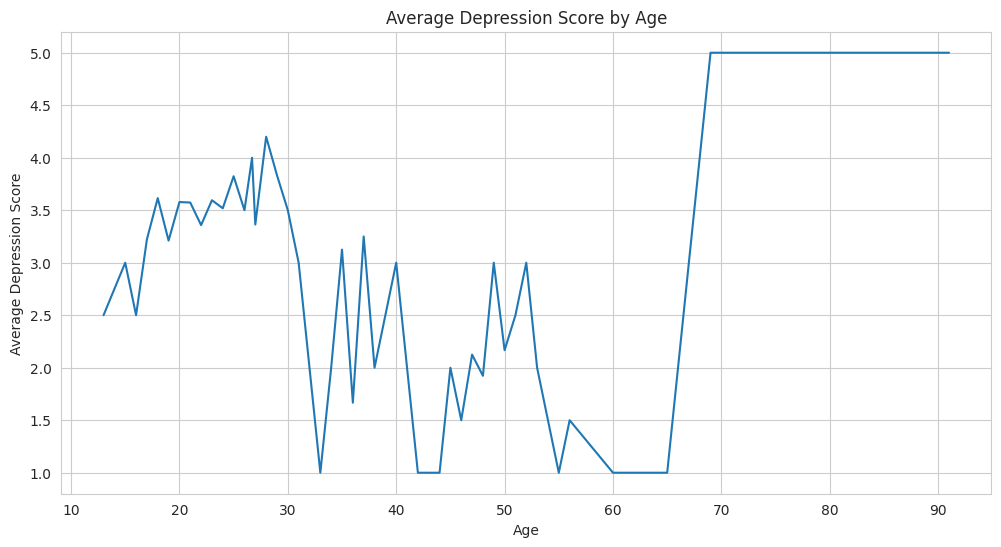

In [12]:
# 抑郁和年龄之间的关系
age_depression = df.groupby('age')['depression_score'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=age_depression, x='age', y='depression_score')
plt.title('Average Depression Score by Age')
plt.xlabel('Age')
plt.ylabel('Average Depression Score')
plt.show()

In [ ]:

usage_map = { 'Yes': 1, 'No': 0}  
df['social_media_usage'] = df['social_media_usage'].map(usage_map) 

df.head()

,age,gender,relationship_status,occupation_status,affiliation,social_media_usage,social_media_platforms,daily_social_media_time,purposeless_use,distraction_by_social_media,restless_without_social_media,distraction_score,worry_score,concentration_difficulty,social_comparison,feeling_about_comparisons,seeking_validation,depression_score,activity_interest,sleep_issues
0,21.0000,Male,In a relationship,University Student,University,1,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,2,5,2,5,2,3,2,5,4,5
1,21.0000,Female,Single,University Student,University,1,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,2,4,5,4,5,1,1,5,4,5
2,21.0000,Female,Single,University Student,University,1,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,1,2,5,4,3,3,1,4,2,5
3,21.0000,Female,Single,University Student,University,1,"Facebook, Instagram",More than 5 hours,4,2,1,3,5,3,5,1,2,4,3,2
4,21.0000,Female,Single,University Student,University,1,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,4,5,5,3,3,3,4,4,1


In [14]:
from scipy.stats import ttest_ind

# Create two groups: social media users and non-users
social_media_users = df[df['social_media_usage'] == 1]
non_users = df[df['social_media_usage'] == 0]

# Specify the mental health indicator you want to test
mental_health_indicator = 'depression_score'

# Perform an independent samples t-test
t_statistic, p_value = ttest_ind(social_media_users[mental_health_indicator], non_users[mental_health_indicator], equal_var=False)

# Print the results
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# Check for significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference.")

T-Statistic: 5.712114308407665
P-Value: 0.02531843953475534
Reject the null hypothesis: There is a significant difference.


In [15]:
use_time_map = { 'Less than an Hour': 1, 'Between 1 and 2 hours': 2, 'Between 2 and 3 hours': 3, 'Between 3 and 4 hours': 4, 'Between 4 and 5 hours': 5, 'More than 5 hours': 6}  
df['daily_social_media_time'] = df['daily_social_media_time'].map(use_time_map) 

df.head()

,age,gender,relationship_status,occupation_status,affiliation,social_media_usage,social_media_platforms,daily_social_media_time,purposeless_use,distraction_by_social_media,restless_without_social_media,distraction_score,worry_score,concentration_difficulty,social_comparison,feeling_about_comparisons,seeking_validation,depression_score,activity_interest,sleep_issues
0,21.0000,Male,In a relationship,University Student,University,1,"Facebook, Twitter, Instagram, YouTube, Discord...",3,5,3,2,5,2,5,2,3,2,5,4,5
1,21.0000,Female,Single,University Student,University,1,"Facebook, Twitter, Instagram, YouTube, Discord...",6,4,3,2,4,5,4,5,1,1,5,4,5
2,21.0000,Female,Single,University Student,University,1,"Facebook, Instagram, YouTube, Pinterest",4,3,2,1,2,5,4,3,3,1,4,2,5
3,21.0000,Female,Single,University Student,University,1,"Facebook, Instagram",6,4,2,1,3,5,3,5,1,2,4,3,2
4,21.0000,Female,Single,University Student,University,1,"Facebook, Instagram, YouTube",3,3,5,4,4,5,5,3,3,3,4,4,1


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

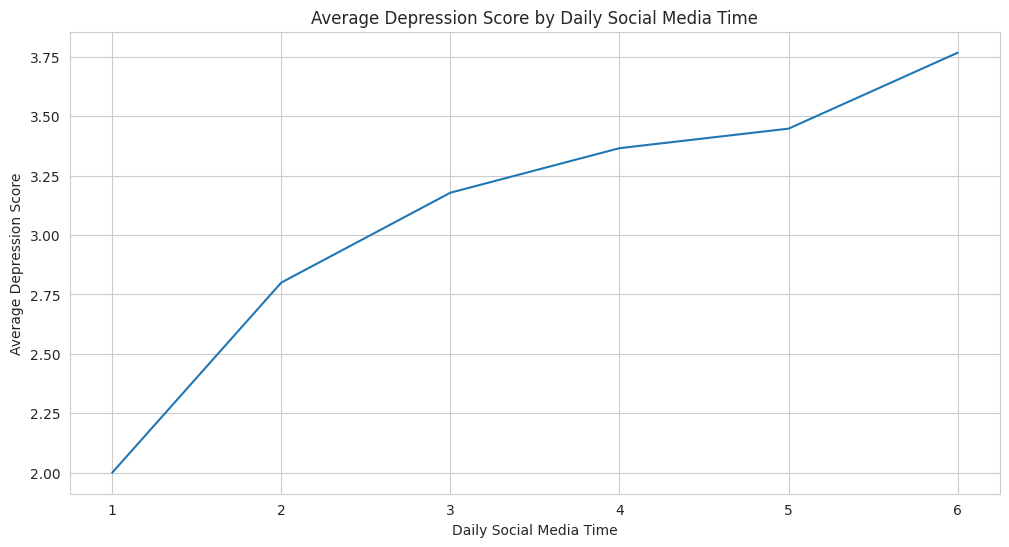

In [ ]:

time_depression = df.groupby('daily_social_media_time')['depression_score'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=time_depression, x='daily_social_media_time', y='depression_score')
plt.title('Average Depression Score by Daily Social Media Time')
plt.xlabel('Daily Social Media Time')
plt.ylabel('Average Depression Score')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='worry_score', ylabel='depression_score'>

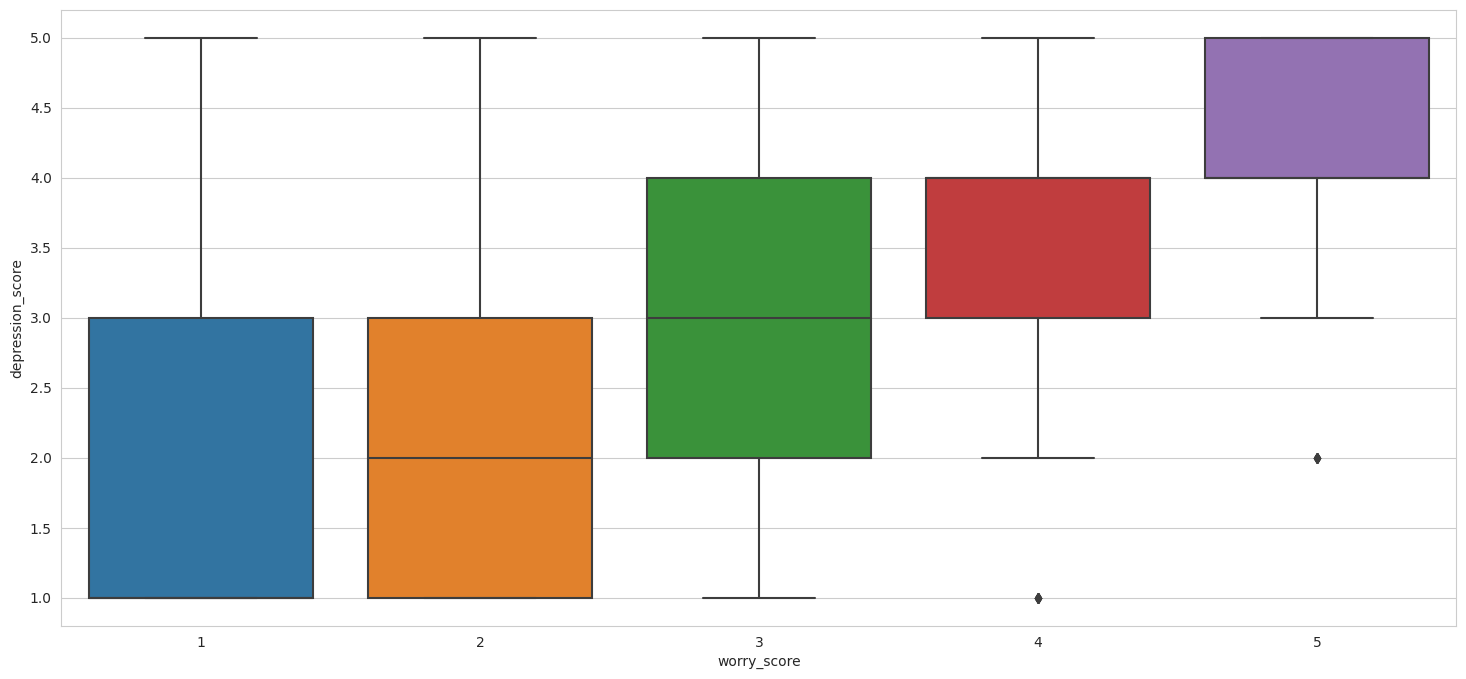

In [ ]:


plt.figure(figsize = (18,8))
sns.boxplot(x = df['worry_score'],y = df['depression_score'])

# 4. Modeling

## (1) Handling skewed distribution

In [18]:
data= df[['age', 'social_media_usage', 'daily_social_media_time','purposeless_use', 'distraction_by_social_media', 'restless_without_social_media', 'distraction_score','worry_score', 'concentration_difficulty','social_comparison', 'feeling_about_comparisons','seeking_validation','depression_score']]
data.head()

,age,social_media_usage,daily_social_media_time,purposeless_use,distraction_by_social_media,restless_without_social_media,distraction_score,worry_score,concentration_difficulty,social_comparison,feeling_about_comparisons,seeking_validation,depression_score
0,21.0000,1,3,5,3,2,5,2,5,2,3,2,5
1,21.0000,1,6,4,3,2,4,5,4,5,1,1,5
2,21.0000,1,4,3,2,1,2,5,4,3,3,1,4
3,21.0000,1,6,4,2,1,3,5,3,5,1,2,4
4,21.0000,1,3,3,5,4,4,5,5,3,3,3,4


In [19]:
delete_lines_index = data[data['social_media_usage'] == 0].index
data.drop(delete_lines_index, inplace = True)
data.drop('social_media_usage', axis = 1, inplace = True)
data

/tmp/ipykernel_13/106370913.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(delete_lines_index, inplace = True)
/tmp/ipykernel_13/106370913.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('social_media_usage', axis = 1, inplace = True)


,age,daily_social_media_time,purposeless_use,distraction_by_social_media,restless_without_social_media,distraction_score,worry_score,concentration_difficulty,social_comparison,feeling_about_comparisons,seeking_validation,depression_score
0,21.0000,3,5,3,2,5,2,5,2,3,2,5
1,21.0000,6,4,3,2,4,5,4,5,1,1,5
2,21.0000,4,3,2,1,2,5,4,3,3,1,4
3,21.0000,6,4,2,1,3,5,3,5,1,2,4
4,21.0000,3,3,5,4,4,5,5,3,3,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...
476,24.0000,3,3,4,3,4,3,4,4,2,4,3
477,26.0000,2,2,1,2,3,4,4,4,2,4,4
478,29.0000,3,3,3,4,3,2,3,3,3,4,2
479,21.0000,3,2,3,2,3,3,2,2,3,4,4


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

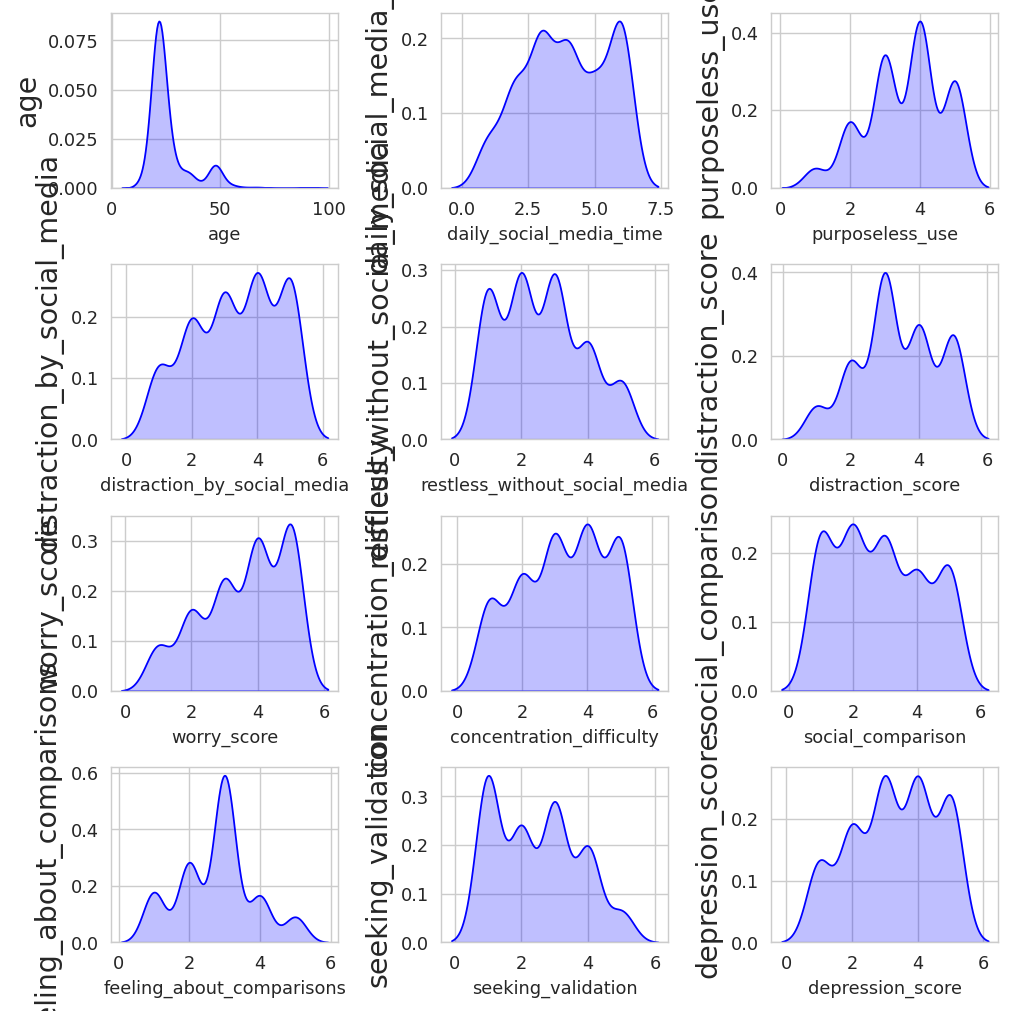

In [20]:
column = data.columns.tolist() # 列表头
fig = plt.figure(figsize=(8,8), dpi=128)  # 指定绘图对象宽度和高度
for i in range(12):
    plt.subplot(4,3, i + 1)  # 2行3列子图
    sns.kdeplot(data=data[column[i]],color='blue',fill= True)  
    plt.ylabel(column[i], fontsize=16)
plt.tight_layout()
plt.show()

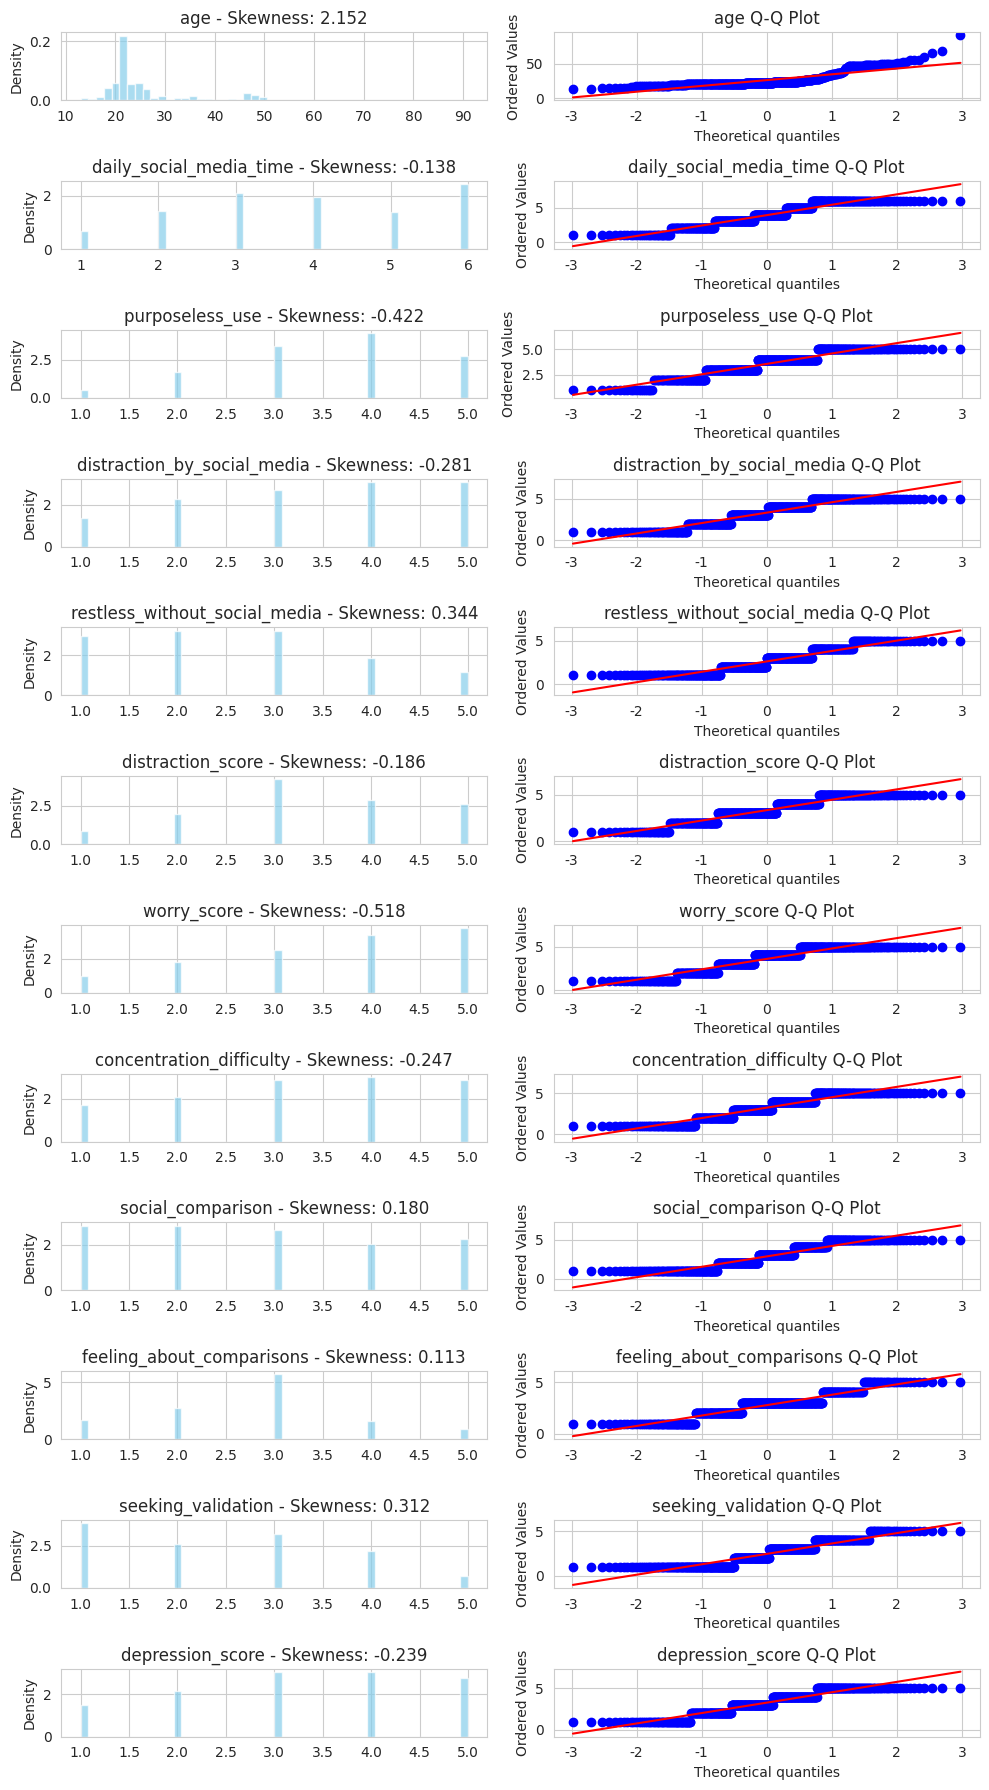

=== Skewness Analysis Report ===
age: Skewness = 2.152 (Right-skewed, High skewness)
daily_social_media_time: Skewness = -0.138 (Left-skewed, Approximately symmetric)
purposeless_use: Skewness = -0.422 (Left-skewed, Approximately symmetric)
distraction_by_social_media: Skewness = -0.281 (Left-skewed, Approximately symmetric)
restless_without_social_media: Skewness = 0.344 (Right-skewed, Approximately symmetric)
distraction_score: Skewness = -0.186 (Left-skewed, Approximately symmetric)
worry_score: Skewness = -0.518 (Left-skewed, Moderate skewness)
concentration_difficulty: Skewness = -0.247 (Left-skewed, Approximately symmetric)
social_comparison: Skewness = 0.180 (Right-skewed, Approximately symmetric)
feeling_about_comparisons: Skewness = 0.113 (Right-skewed, Approximately symmetric)
seeking_validation: Skewness = 0.312 (Right-skewed, Approximately symmetric)
depression_score: Skewness = -0.239 (Left-skewed, Approximately symmetric)


In [21]:
from scipy import stats
from scipy.stats import skew, norm, boxcox
import warnings
warnings.filterwarnings('ignore')

def diagnose_skewness(data, figsize=(10, 18)):
    """Diagnose skewness in data"""
    n_cols = len(data.columns)
    fig, axes = plt.subplots(n_cols, 2, figsize=figsize)
    
    skewness_results = {}
    
    for i, col in enumerate(data.columns):
        # Calculate skewness
        skew_val = skew(data[col])
        skewness_results[col] = skew_val
        
        # Histogram
        axes[i, 0].hist(data[col], bins=50, alpha=0.7, density=True, color='skyblue')
        axes[i, 0].set_title(f'{col} - Skewness: {skew_val:.3f}')
        axes[i, 0].set_ylabel('Density')
        
        # Q-Q Plot
        stats.probplot(data[col], dist="norm", plot=axes[i, 1])
        axes[i, 1].set_title(f'{col} Q-Q Plot')
    
    plt.tight_layout()
    plt.show()
    
    # Print skewness analysis
    print("=== Skewness Analysis Report ===")
    for col, skew_val in skewness_results.items():
        if abs(skew_val) < 0.5:
            assessment = "Approximately symmetric"
        elif 0.5 <= abs(skew_val) < 1:
            assessment = "Moderate skewness"
        else:
            assessment = "High skewness"
        
        direction = "Right-skewed" if skew_val > 0 else "Left-skewed" if skew_val < 0 else "Symmetric"
        print(f"{col}: Skewness = {skew_val:.3f} ({direction}, {assessment})")
    
    return skewness_results

# Run diagnosis
skewness_report = diagnose_skewness(data)

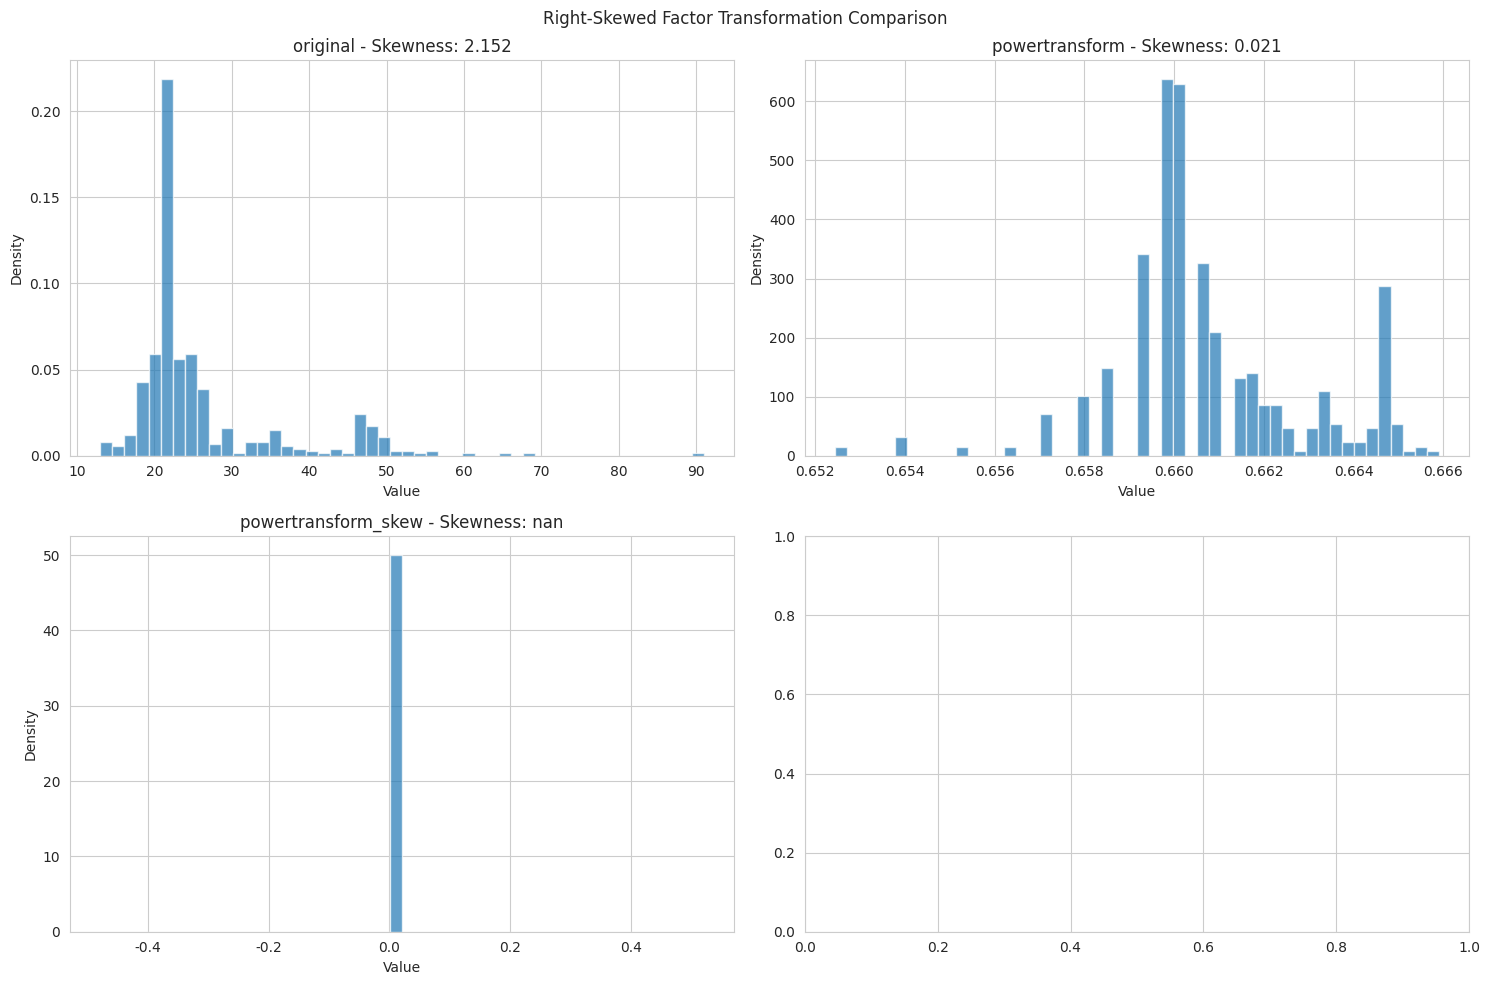

In [22]:
def handle_right_skew(series, method='log', constant=1):
    """Multiple methods to handle right-skewed distributions"""
    original_skew = skew(series)
    results = {'original': series, 'original_skew': original_skew}
        
    if method == 'boxcox':
        # Box-Cox transformation (automatically handles non-positive values)
        if series.min() <= 0:
            shifted = series - series.min() + 1
        else:
            shifted = series
            
        transformed, fitted_lambda = boxcox(shifted)
        results['boxcox'] = transformed
        results['boxcox_skew'] = skew(transformed)
        results['boxcox_lambda'] = fitted_lambda

    elif method == 'powertransform':
        # Power transformation
        if series.min() <= 0:
            shifted = series - series.min() + 1
        else:
            shifted = series
            
        transformed = 2/3 * (1- 1/(np.sqrt(shifted**3)))
        results['powertransform'] = transformed
        results['powertransform_skew'] = skew(transformed)
        
    return results

# Apply different transformations to right-skewed factor
right_skew_factor = data['age']
right_results = handle_right_skew(right_skew_factor, 'powertransform')

# Visual comparison
def compare_transformations(original_data, transformation_results, title):
    """Compare effects of different transformation methods"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    methods = list(transformation_results.keys())
    if 'original' in methods:
        methods.remove('original')
        methods.remove('original_skew')
    
    for i, method in enumerate(['original'] + methods[:3]):
        row, col = i // 2, i % 2
        if method == 'original':
            data_to_plot = original_data
            skew_val = transformation_results['original_skew']
        else:
            data_to_plot = transformation_results[method]
            skew_val = transformation_results.get(f'{method}_skew', skew(data_to_plot))
        
        axes[row, col].hist(data_to_plot, bins=50, alpha=0.7, density=True)
        axes[row, col].set_title(f'{method} - Skewness: {skew_val:.3f}')
        axes[row, col].set_xlabel('Value')
        axes[row, col].set_ylabel('Density')
    
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

compare_transformations(right_skew_factor, right_results, "Right-Skewed Factor Transformation Comparison")

In [23]:
data['age_transformed'] = right_results['powertransform']

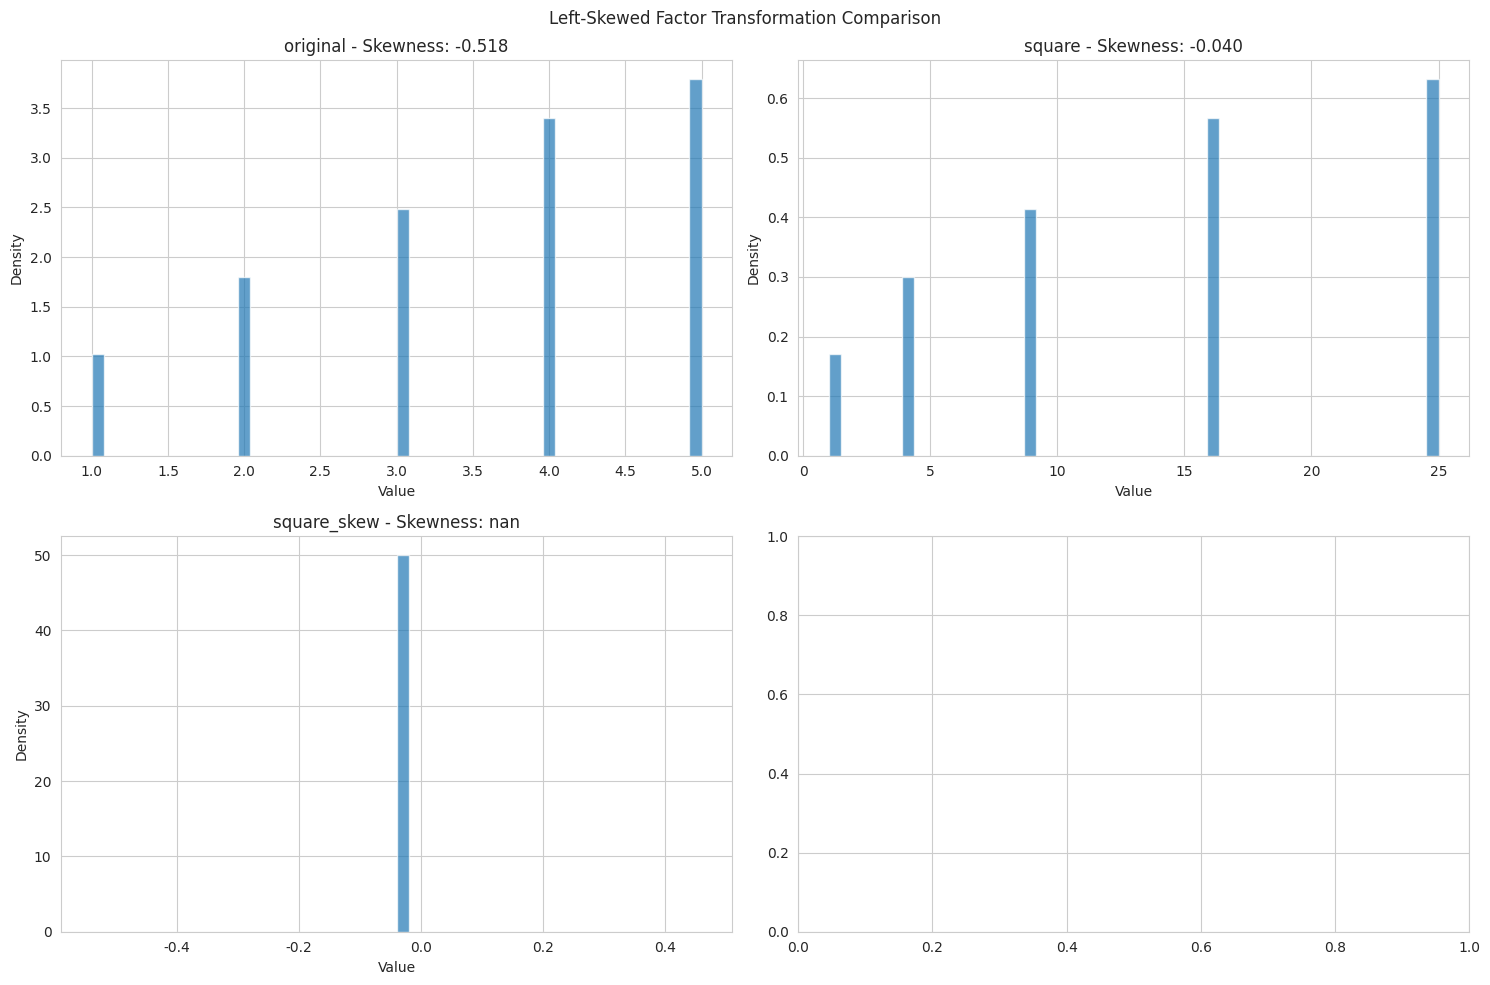

In [24]:
def handle_left_skew(series, method='reflect_log'):
    """Multiple methods to handle left-skewed distributions"""
    original_skew = skew(series)
    results = {'original': series, 'original_skew': original_skew}
    
    if method == 'reflect_log':
        # Reflection transformation + log transformation
        max_val = series.max()
        reflected = max_val + 1 - series  # Reflection
        transformed = np.log(reflected)   # Log transformation
        results['reflect_log'] = transformed
        results['reflect_log_skew'] = skew(transformed)
        
    elif method == 'square':
        # Square transformation
        transformed = series ** 2
        results['square'] = transformed
        results['square_skew'] = skew(transformed)
        
    elif method == 'reflect_sqrt':
        # Reflection transformation + sqrt transformation
        max_val = series.max()
        reflected = max_val + 1 - series  # Reflection
        transformed = np.sqrt(reflected)   # Log transformation
        results['reflect_sqrt'] = transformed
        results['reflect_sqrt_skew'] = skew(transformed)
    
    return results

# Apply transformations to left-skewed factor
left_skew_factor = data['worry_score']
left_results = handle_left_skew(left_skew_factor, method='square')

compare_transformations(left_skew_factor, left_results, "Left-Skewed Factor Transformation Comparison")

In [25]:
data['worry_score_transformed'] = left_results['square']
data.drop(['age','worry_score'], axis = 1, inplace = True)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 478 entries, 0 to 480
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   daily_social_media_time        478 non-null    int64  
 1   purposeless_use                478 non-null    int64  
 2   distraction_by_social_media    478 non-null    int64  
 3   restless_without_social_media  478 non-null    int64  
 4   distraction_score              478 non-null    int64  
 5   concentration_difficulty       478 non-null    int64  
 6   social_comparison              478 non-null    int64  
 7   feeling_about_comparisons      478 non-null    int64  
 8   seeking_validation             478 non-null    int64  
 9   depression_score               478 non-null    int64  
 10  age_transformed                478 non-null    float64
 11  worry_score_transformed        478 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 48.5 KB


In [ ]:
data = data.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 9]]
data

,daily_social_media_time,purposeless_use,distraction_by_social_media,restless_without_social_media,distraction_score,concentration_difficulty,social_comparison,feeling_about_comparisons,seeking_validation,age_transformed,worry_score_transformed,depression_score
0,3,5,3,2,5,5,2,3,2,0.6597,4,5
1,6,4,3,2,4,4,5,1,1,0.6597,25,5
2,4,3,2,1,2,4,3,3,1,0.6597,25,4
3,6,4,2,1,3,3,5,1,2,0.6597,25,4
4,3,3,5,4,4,5,3,3,3,0.6597,25,4
...,...,...,...,...,...,...,...,...,...,...,...,...
476,3,3,4,3,4,4,4,2,4,0.6610,9,3
477,2,2,1,2,3,4,4,2,4,0.6616,16,4
478,3,3,3,4,3,3,3,3,4,0.6624,4,2
479,3,2,3,2,3,2,2,3,4,0.6597,9,4


## (2) Handling Outliers and Standardization

In [ ]:
def detect_outliers_3sigma(data, column, drop = False):
    
    mean_value = data[column].mean()
    std_value = data[column].std()

    lower_bound = mean_value - 3 * std_value
    upper_bound = mean_value + 3 * std_value

    rule = (data[column] < lower_bound) | (data[column] > upper_bound)
    outliers = data[column].index[rule]
    
    print(outliers)
    

    if drop:
        data.drop(outliers, inplace=True)
        return data

for column in data.columns:
    detect_outliers_3sigma(data, column, drop = True)

Index([], dtype='int64')
Index([], dtype='int64')
Index([], dtype='int64')
Index([], dtype='int64')
Index([], dtype='int64')
Index([], dtype='int64')
Index([], dtype='int64')
Index([], dtype='int64')
Index([], dtype='int64')
Index([68, 72, 96, 463, 464, 465], dtype='int64')
Index([], dtype='int64')
Index([], dtype='int64')


In [ ]:

scaler = StandardScaler()
data[data.columns] = scaler.fit_transform(data[data.columns]) 

In [30]:
data

,daily_social_media_time,purposeless_use,distraction_by_social_media,restless_without_social_media,distraction_score,concentration_difficulty,social_comparison,feeling_about_comparisons,seeking_validation,age_transformed,worry_score_transformed,depression_score
0,-0.5782,1.3194,-0.2485,-0.4817,1.3965,1.2912,-0.6086,0.2142,-0.3795,-0.5715,-1.2378,1.3196
1,1.3171,0.4049,-0.2485,-0.4817,0.5449,0.5461,1.5299,-1.6755,-1.1827,-0.5715,1.2559,1.3196
2,0.0535,-0.5095,-1.0053,-1.2768,-1.1584,0.5461,0.1042,0.2142,-1.1827,-0.5715,1.2559,0.5544
3,1.3171,0.4049,-1.0053,-1.2768,-0.3067,-0.1989,1.5299,-1.6755,-0.3795,-0.5715,1.2559,0.5544
4,-0.5782,-0.5095,1.2651,1.1084,0.5449,1.2912,0.1042,0.2142,0.4237,-0.5715,1.2559,0.5544
...,...,...,...,...,...,...,...,...,...,...,...,...
476,-0.5782,-0.5095,0.5083,0.3133,0.5449,0.5461,0.8170,-0.7306,1.2269,0.0701,-0.6441,-0.2107
477,-1.2100,-1.4240,-1.7621,-0.4817,-0.3067,0.5461,0.8170,-0.7306,1.2269,0.3975,0.1872,0.5544
478,-0.5782,-0.5095,-0.2485,1.1084,-0.3067,-0.1989,0.1042,0.2142,1.2269,0.7851,-1.2378,-0.9759
479,-0.5782,-1.4240,-0.2485,-0.4817,-0.3067,-0.9439,-0.6086,0.2142,1.2269,-0.5715,-0.6441,0.5544


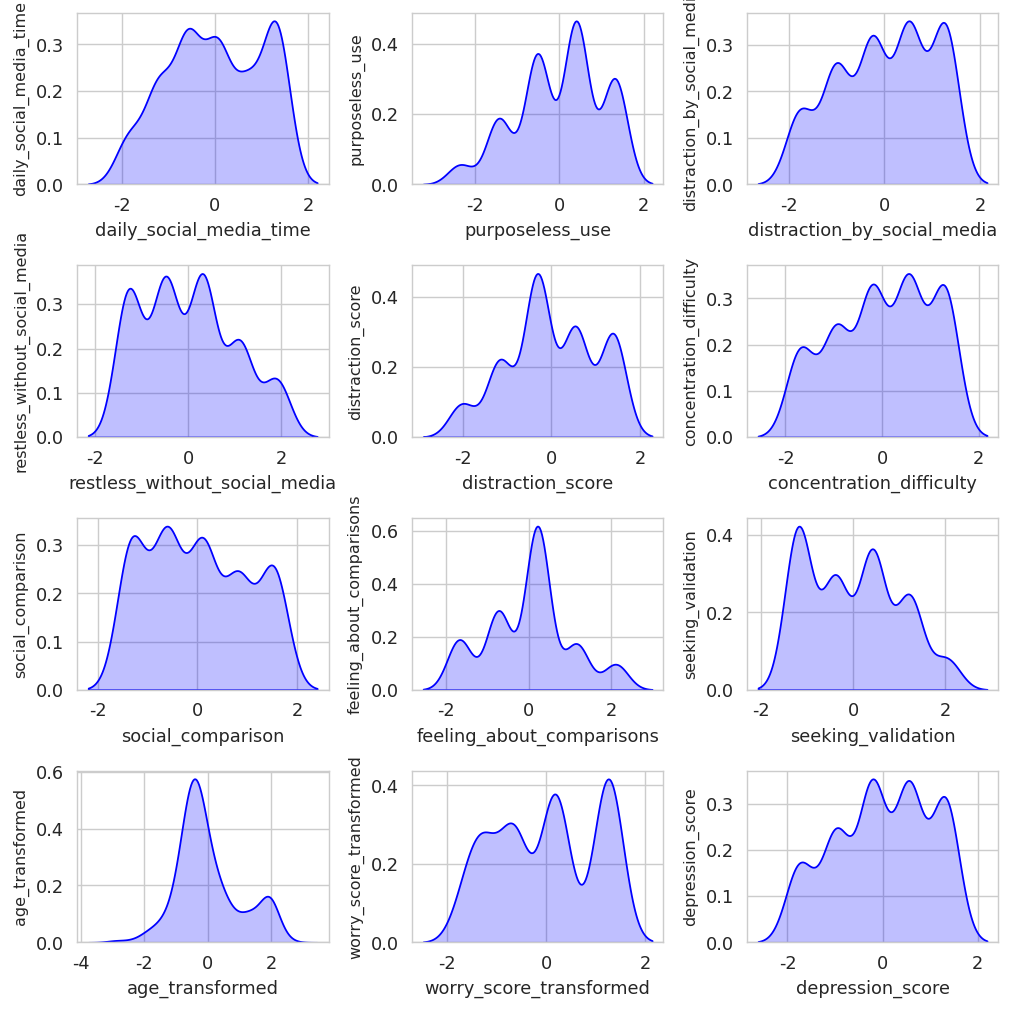

In [ ]:
column = data.columns.tolist() 
fig = plt.figure(figsize=(8,8), dpi=128)  
for i in range(12):
    plt.subplot(4,3, i + 1) 
    sns.kdeplot(data=data[column[i]],color='blue',fill= True)  
    plt.ylabel(column[i], fontsize=9)
plt.tight_layout()
plt.show()

## (3) OLS Linear Regression Analysis

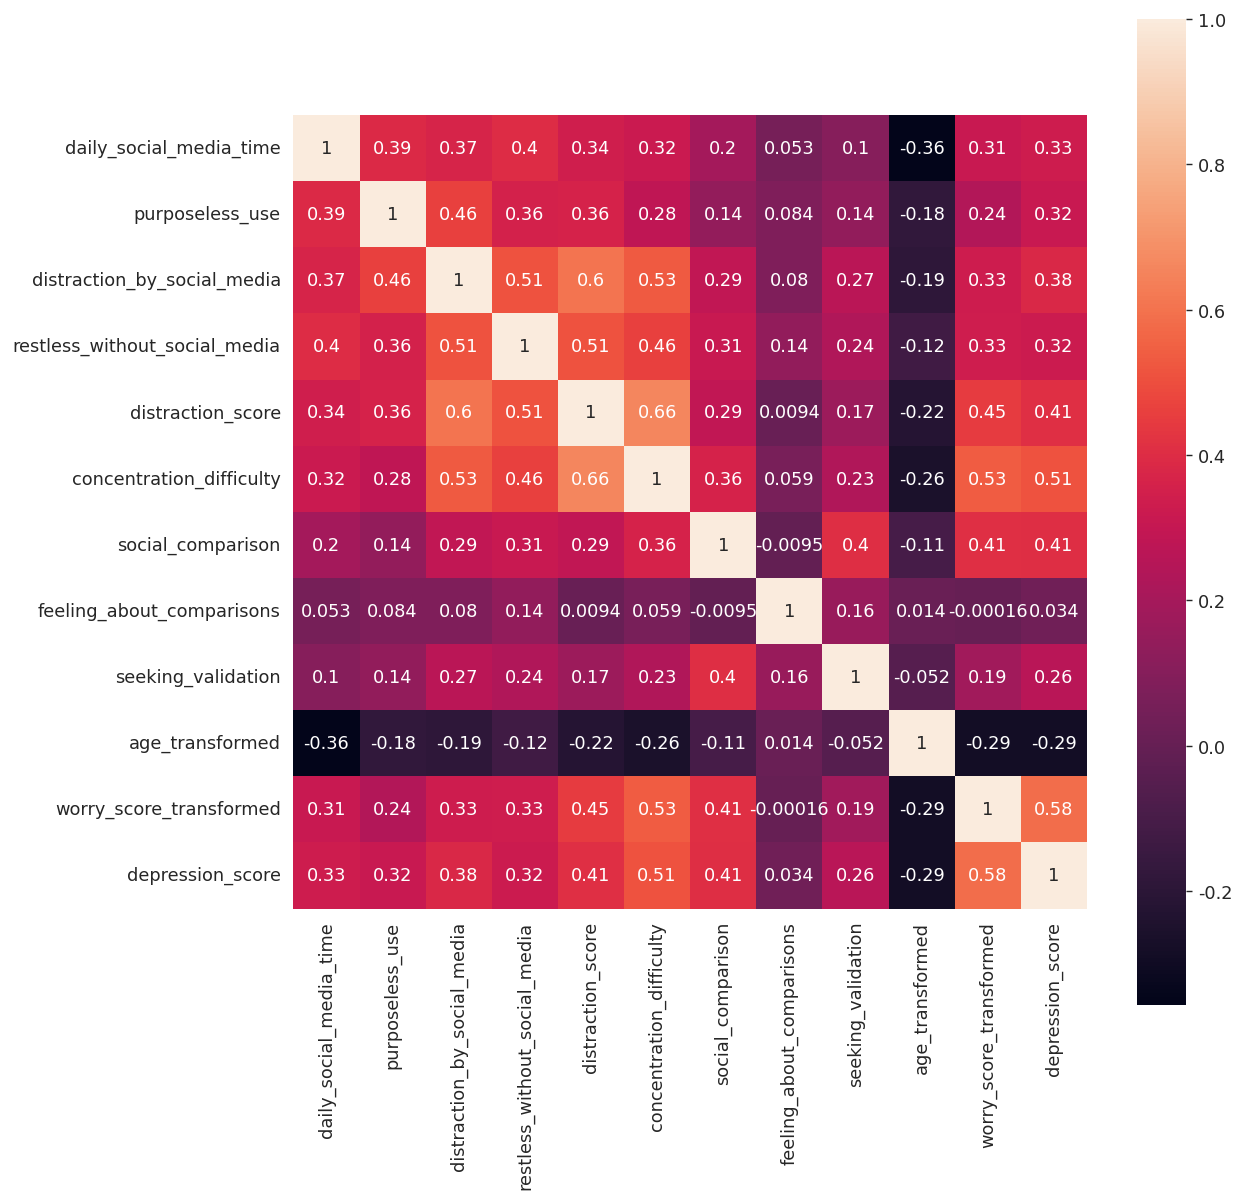

In [ ]:

corr = plt.subplots(figsize = (10,10),dpi=128)
corr= sns.heatmap(data[column].corr(),annot=True,square=True)

In [ ]:
def calculate_correlation_with_significance(dataframe):
    significance_levels = [(0.001, '***'), (0.01, '**'), (0.05, '*'), (1.0, '')]
    
    
    result_df = pd.DataFrame({
        var1: {
            var2: ( f"{1.0} " if var1 == var2 else
                    f" {next(sign for threshold, sign in significance_levels if p < threshold)}{r:.3f}"
            )
            for var2 in dataframe.columns
            for r, p in [stats.pearsonr(dataframe[var1], dataframe[var2])]
        }
        for var1 in dataframe.columns
    })
    
    
    mask = np.tril(np.ones(result_df.shape), k=0).astype(bool)
    result_df = result_df.where(mask, '')
 
    return result_df
merged_df = calculate_correlation_with_significance(data)
merged_df

,daily_social_media_time,purposeless_use,distraction_by_social_media,restless_without_social_media,distraction_score,concentration_difficulty,social_comparison,feeling_about_comparisons,seeking_validation,age_transformed,worry_score_transformed,depression_score
daily_social_media_time,1.0,,,,,,,,,,,
purposeless_use,***0.388,1.0,,,,,,,,,,
distraction_by_social_media,***0.368,***0.460,1.0,,,,,,,,,
restless_without_social_media,***0.398,***0.357,***0.513,1.0,,,,,,,,
distraction_score,***0.338,***0.360,***0.604,***0.511,1.0,,,,,,,
concentration_difficulty,***0.319,***0.284,***0.529,***0.460,***0.661,1.0,,,,,,
social_comparison,***0.196,**0.143,***0.288,***0.312,***0.285,***0.363,1.0,,,,,
feeling_about_comparisons,0.053,0.084,0.080,**0.137,0.009,0.059,-0.009,1.0,,,,
seeking_validation,*0.100,**0.140,***0.268,***0.237,***0.171,***0.233,***0.405,***0.160,1.0,,,
age_transformed,***-0.356,***-0.179,***-0.190,**-0.125,***-0.218,***-0.260,*-0.106,0.014,-0.052,1.0,,


In [34]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
X = sm.add_constant(X)

In [35]:
all_columns = "+".join(data.columns[:-1])
print('x: '+all_columns)
print('\n')
formula = 'depression_score~' + all_columns
print('Regression Formula: '+formula)

x: daily_social_media_time+purposeless_use+distraction_by_social_media+restless_without_social_media+distraction_score+concentration_difficulty+social_comparison+feeling_about_comparisons+seeking_validation+age_transformed+worry_score_transformed


Regression Formula: depression_score~daily_social_media_time+purposeless_use+distraction_by_social_media+restless_without_social_media+distraction_score+concentration_difficulty+social_comparison+feeling_about_comparisons+seeking_validation+age_transformed+worry_score_transformed


In [36]:
results = smf.ols(formula, data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       depression_score   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     34.02
Date:                Sat, 27 Sep 2025   Prob (F-statistic):           8.15e-53
Time:                        10:14:08   Log-Likelihood:                -529.24
No. Observations:                 472   AIC:                             1082.
Df Residuals:                     460   BIC:                             1132.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                     -1.388e-17      0.035  -4.01e-16      1.000      -0.068       0.068
daily_social_media_time           0.0543      0.042      1.296      0.196      -0.028       0.137
purposeless_use                   0.1064      0.041      2.606      0.009       0.026       0.187
distraction_by_social_media       0.0440      0.049      0.902      0.367      -0.052       0.140
restless_without_social_media    -0.0249      0.045     -0.556      0.579      -0.113       0.063
distraction_score                -0.0026      0.052     -0.050      0.960      -0.105       0.100
concentration_difficulty          0.1782      0.051      3.474      0.001       0.077       0.279
social_comparison                 0.1319      0.042      3.162      0.002       0.050       0.214
feeling_about_comparisons         0.0037      0.036      0.105      0.917      -0.066       0.074
seeking_validation                0.0672      0.039      1.717      0.087      -0.010       0.144
age_transformed                  -0.0837      0.038     -2.190      0.029      -0.159      -0.009
worry_score_transformed           0.3489      0.044      7.923      0.000       0.262       0.435
==============================================================================
Omnibus:                        0.057   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.972   Jarque-Bera (JB):                0.122
Skew:                           0.021   Prob(JB):                        0.941
Kurtosis:                       2.933   Cond. No.                         3.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:

def backward_elimination(X, y, threshold_out=0.05):
    included = list(X.columns)
    
    if 'const' in included:
        included.remove('const')
 
    included = ['const'] + included
    while True:
        changed = False
        model = sm.OLS(y, X[included]).fit()
        
        pvalues = model.pvalues
        
        pvalues_without_const = pvalues.drop('const', errors='ignore')
        if len(pvalues_without_const) == 0:
            break
        worst_pval = pvalues_without_const.max()
        if worst_pval > threshold_out:
            worst_feature = pvalues_without_const.idxmax()
            included.remove(worst_feature)
            changed = True
        if not changed:
            break
    return included

final_variables = backward_elimination(X, y)
print("最终保留的变量：", final_variables)

final_model = sm.OLS(y, X[final_variables]).fit()
print(final_model.summary())

最终保留的变量： ['const', 'purposeless_use', 'concentration_difficulty', 'social_comparison', 'age_transformed', 'worry_score_transformed']
                            OLS Regression Results                            
Dep. Variable:       depression_score   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     73.61
Date:                Sat, 27 Sep 2025   Prob (F-statistic):           9.90e-57
Time:                        10:14:08   Log-Likelihood:                -532.36
No. Observations:                 472   AIC:                             1077.
Df Residuals:                     466   BIC:                             1102.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.

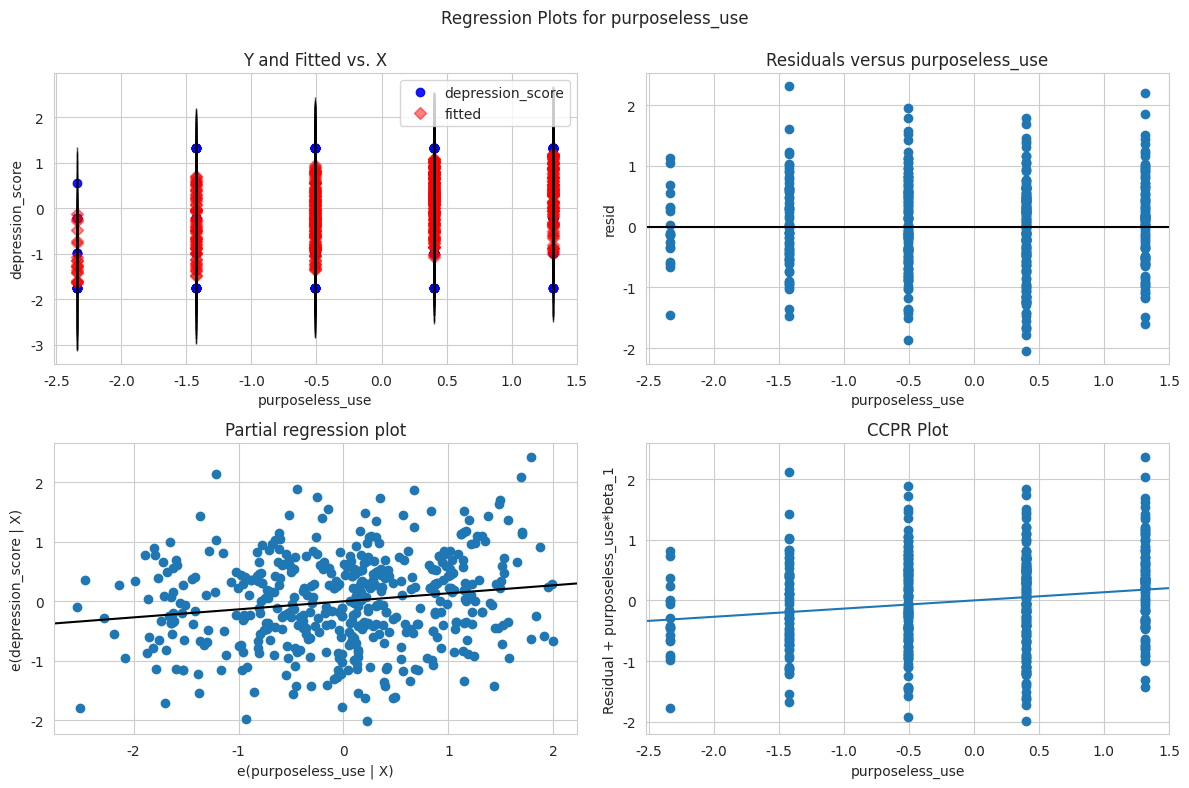

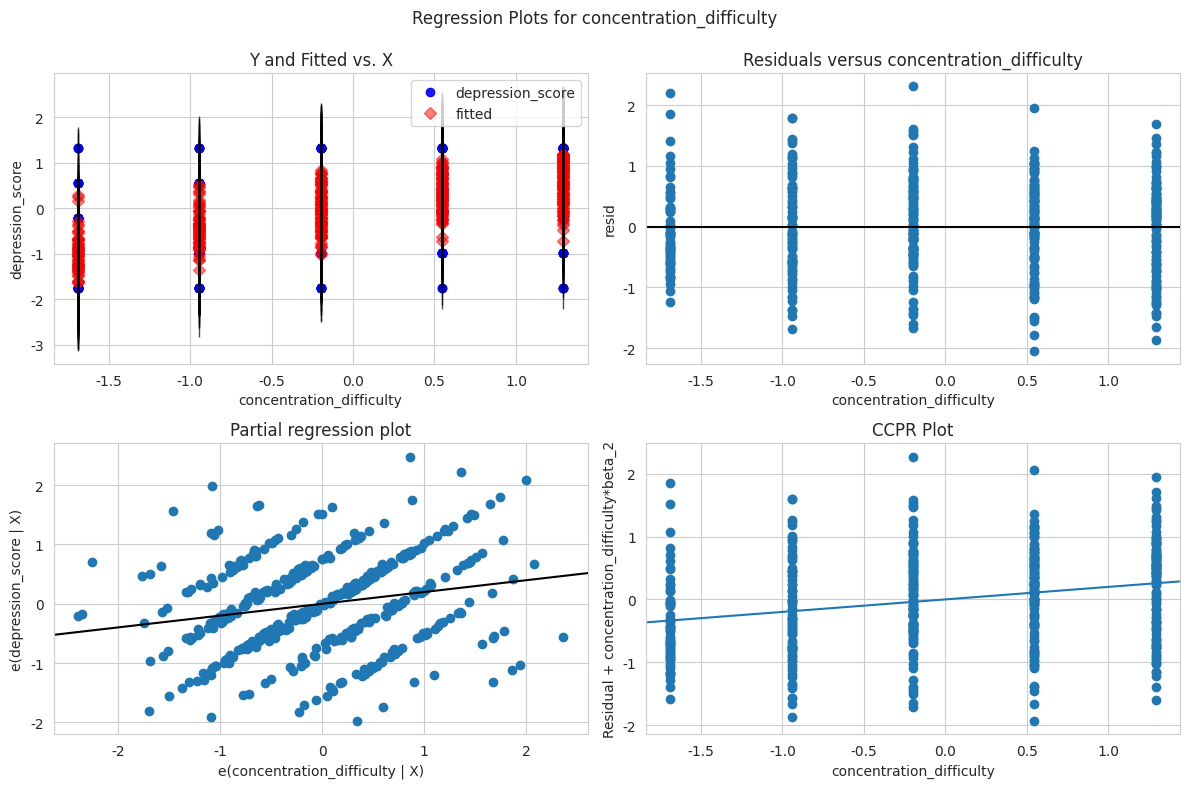

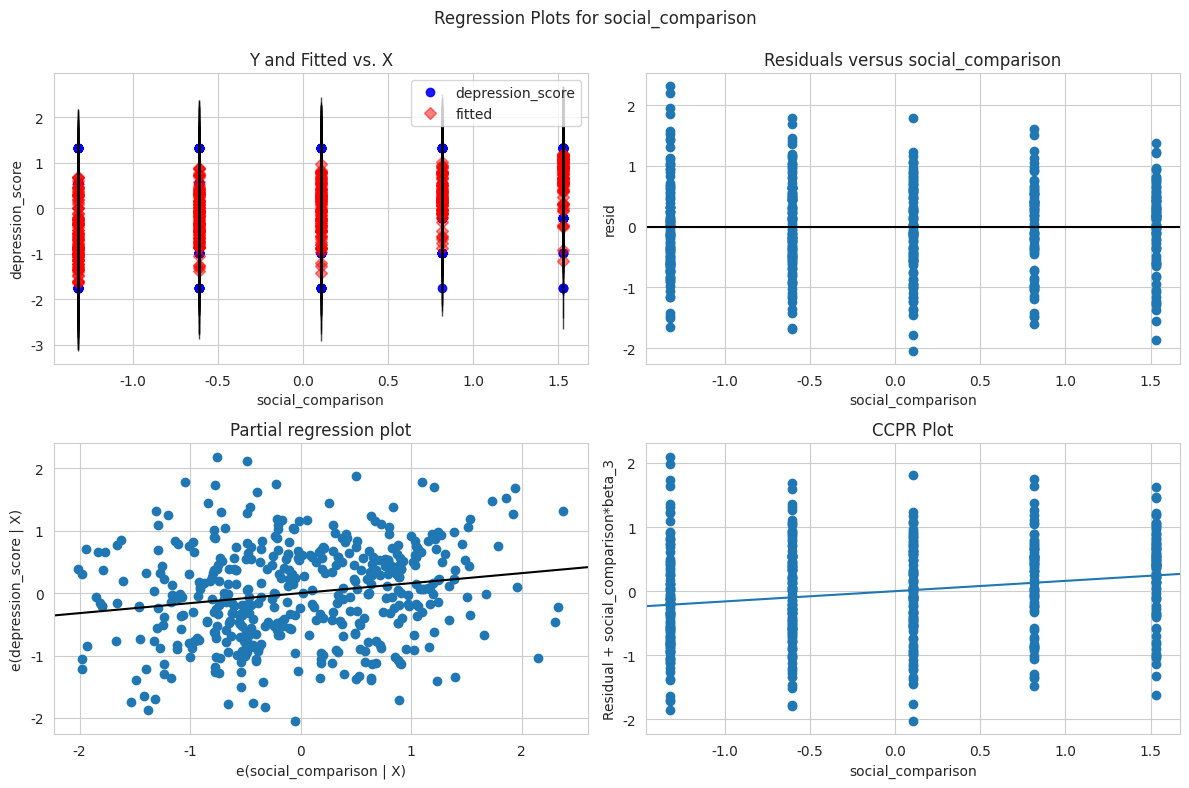

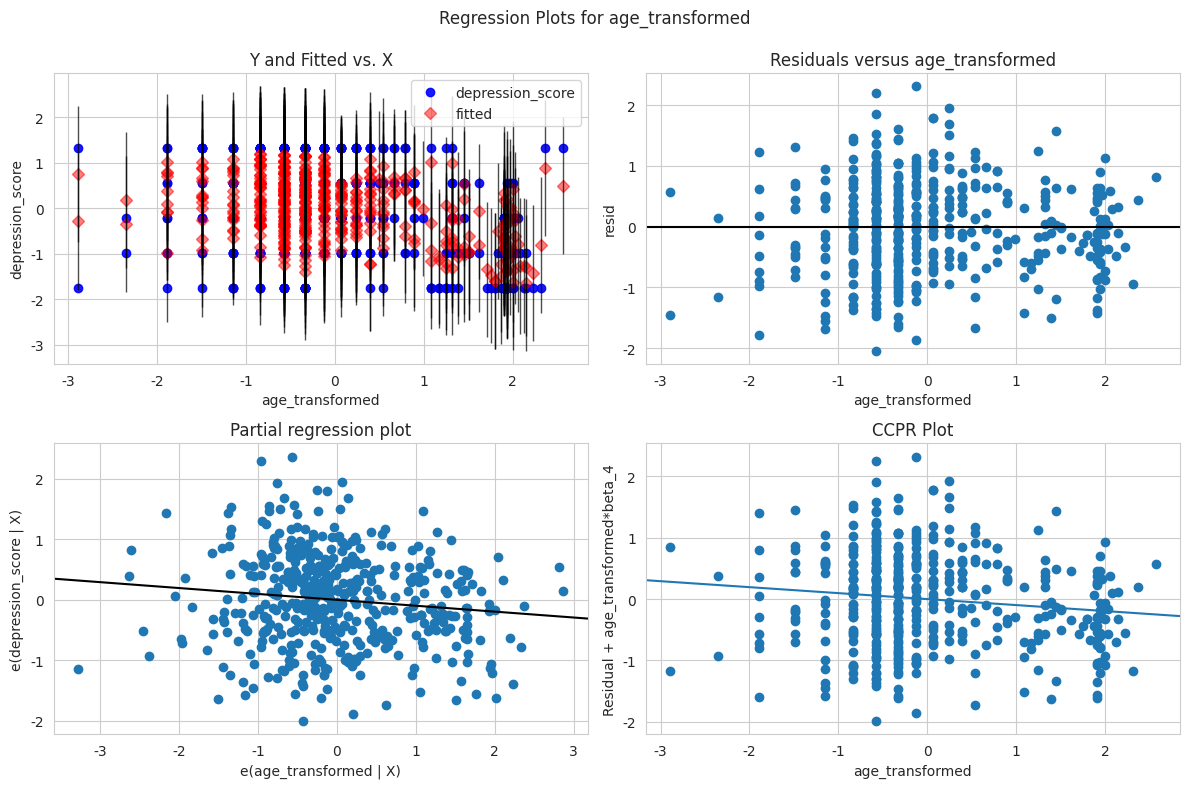

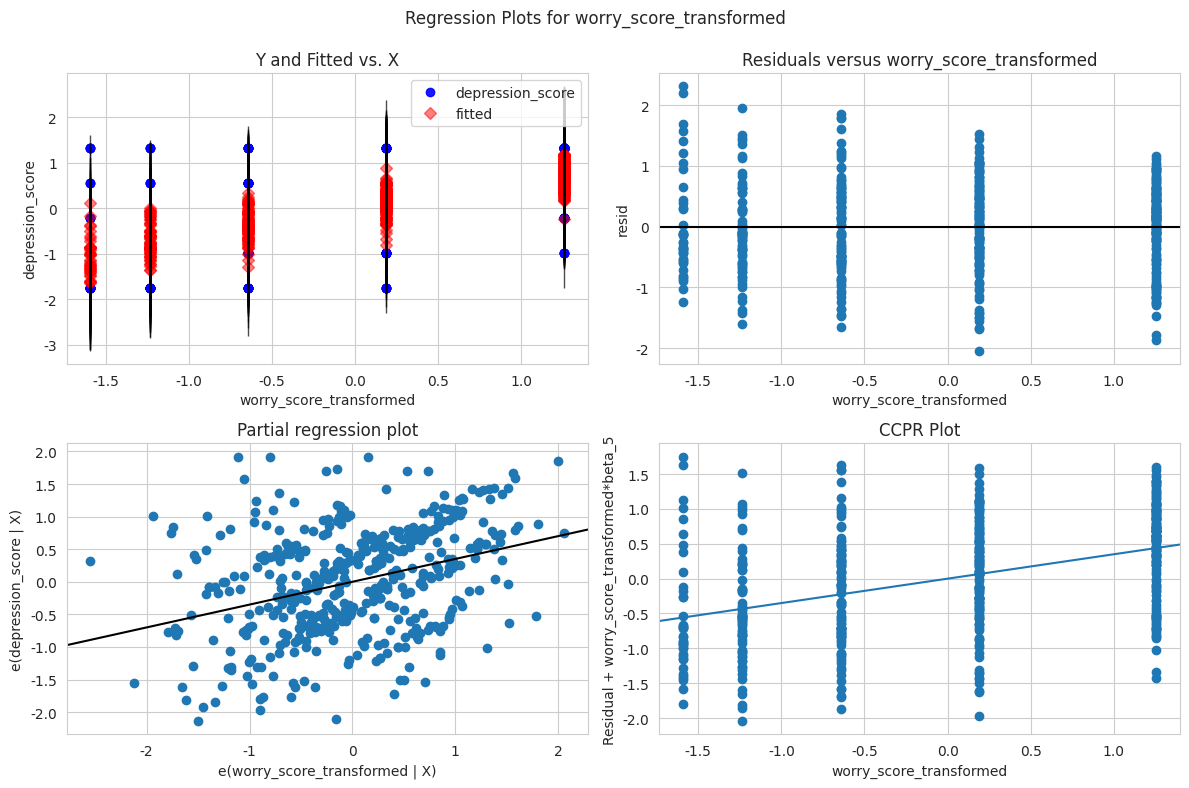

In [38]:
for i in final_variables:
    if i == 'const':
        continue
    else:
        fig = plt.figure(figsize=(12, 8))
        fig = sm.graphics.plot_regress_exog(final_model, i, fig=fig)
        plt.show() 

In [39]:
def VIF_calculate(df_all,y_name):
    x_cols=df_all.columns.to_list()
    x_cols.remove(y_name)
    
    def vif(df_exog,exog_name):
        exog_use = list(df_exog.columns)
        exog_use.remove(exog_name)
        model=smf.ols(f"{exog_name}~{'+'.join(list(exog_use))}",data=df_exog).fit()
        return 1./(1.-model.rsquared)
 
    df_vif=pd.DataFrame()
    for x in x_cols:
        df_vif.loc['VIF',x]=vif(df_all[x_cols],x)
        
    df_vif.loc['tolerance']=1/df_vif.loc['VIF']
    df_vif=df_vif.T.sort_values('VIF',ascending=False)
    df_vif.loc['mean_vif']=df_vif.mean()
    return df_vif
VIF_calculate(data,'depression_score')

,VIF,tolerance
distraction_score,2.2659,0.4413
concentration_difficulty,2.1946,0.4557
distraction_by_social_media,1.9875,0.5031
restless_without_social_media,1.6750,0.5970
worry_score_transformed,1.6172,0.6183
daily_social_media_time,1.4648,0.6827
social_comparison,1.4515,0.6889
purposeless_use,1.3919,0.7185
seeking_validation,1.2780,0.7825
age_transformed,1.2189,0.8204


## (4) Regression Results Visualization 

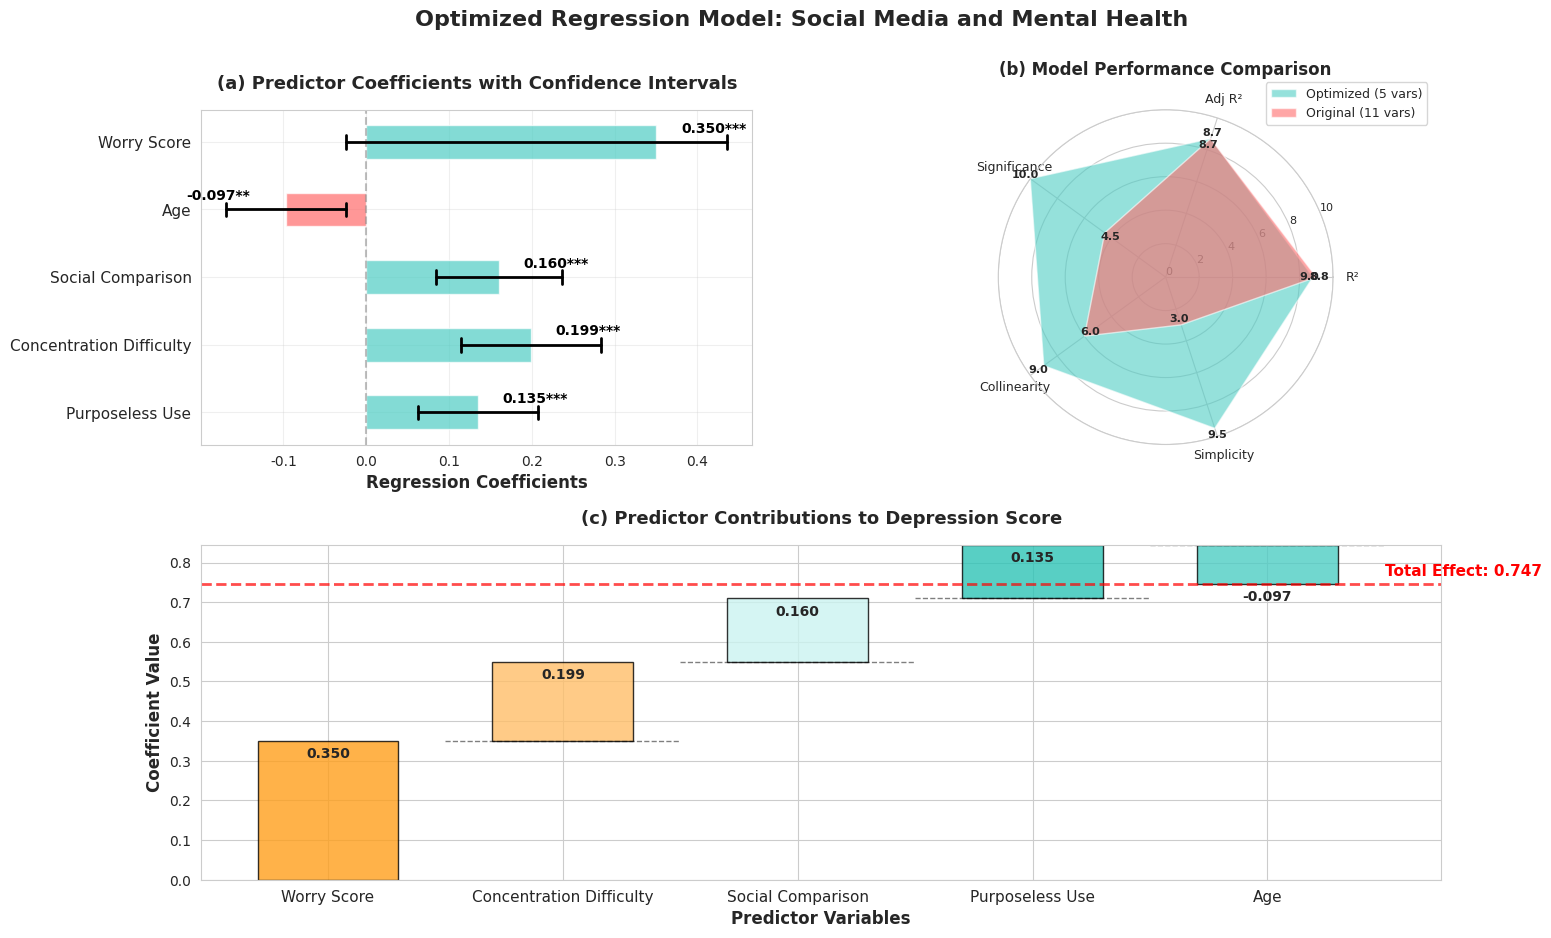

In [40]:
# Create figure with adjusted layout for 3 charts
fig = plt.figure(figsize=(16, 10))
# Create a 2x2 grid but only use 3 positions
gs = gridspec.GridSpec(2, 2, figure=fig, hspace=0.3, wspace=0.25)

# Data preparation
variables = ['Purposeless Use', 'Concentration Difficulty', 'Social Comparison', 'Age', 'Worry Score']
coefficients = [0.1350, 0.1988, 0.1603, -0.0973, 0.3502]
p_values = [0.000, 0.000, 0.000, 0.008, 0.000]
conf_lower = [0.063, 0.115, 0.084, -0.169, -0.025]
conf_upper = [0.207, 0.283, 0.236, -0.025, 0.436]

# Top-left: Coefficients and Confidence Intervals (Chart 1)
ax1 = fig.add_subplot(gs[0, 0])
colors = ['#FF6B6B' if coef < 0 else '#4ECDC4' for coef in coefficients]
y_pos = np.arange(len(variables))

# Use narrower bars to prevent overlap
bars = ax1.barh(y_pos, coefficients, color=colors, alpha=0.7, height=0.5)
ax1.axvline(x=0, color='gray', linestyle='--', alpha=0.5)

# Add confidence intervals with adjusted positioning
for i, (lower, upper) in enumerate(zip(conf_lower, conf_upper)):
    ax1.plot([lower, upper], [i, i], color='black', linewidth=2)
    ax1.plot([lower, lower], [i-0.1, i+0.1], color='black', linewidth=2)
    ax1.plot([upper, upper], [i-0.1, i+0.1], color='black', linewidth=2)

# Add value labels with adjusted positioning and light blue color
# Moved labels upward to avoid overlap with black confidence interval lines
for i, (coef, p_val) in enumerate(zip(coefficients, p_values)):
    sign = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else ""
    x_pos = coef + (0.03 if coef >= 0 else -0.12)  # Adjusted positioning
    
    # Move labels upward by 0.2 units to avoid overlap with black lines
    y_label_pos = i + 0.2
    
    # Change font color to light blue
    ax1.text(x_pos, y_label_pos, f'{coef:.3f}{sign}', va='center', fontsize=10, 
             fontweight='bold' if p_val < 0.05 else 'normal', color='black')

ax1.set_yticks(y_pos)
ax1.set_yticklabels(variables, fontsize=11)
ax1.set_xlabel('Regression Coefficients', fontsize=12, fontweight='bold')
ax1.set_title('(a) Predictor Coefficients with Confidence Intervals', fontsize=13, fontweight='bold', pad=15)
ax1.grid(True, alpha=0.3)

# Top-right: Model Comparison Radar Chart (Chart 2)
ax2 = fig.add_subplot(gs[0, 1], polar=True)

metrics = ['R²', 'Adj R²', 'Significance', 'Collinearity', 'Simplicity']
# Standardized scores (0-10)
optimized_scores = [8.8, 8.7, 10.0, 9.0, 9.5]  # Optimized model
original_scores = [9.0, 8.7, 4.5, 6.0, 3.0]    # Original model

# Angle calculation
angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]  # Close the shape

# Extend score arrays
optimized_scores += optimized_scores[:1]
original_scores += original_scores[:1]

# Draw areas
ax2.fill(angles, optimized_scores, '#4ECDC4', alpha=0.6, label='Optimized (5 vars)')
ax2.fill(angles, original_scores, '#FF6B6B', alpha=0.6, label='Original (11 vars)')

# Add scale labels with adjusted font size
ax2.set_xticks(angles[:-1])
ax2.set_xticklabels(metrics, fontsize=9)  # Smaller font to prevent overlap
ax2.set_ylim(0, 10)
ax2.set_yticks([0, 2, 4, 6, 8, 10])
ax2.set_yticklabels(['0', '2', '4', '6', '8', '10'], fontsize=8)

# Add value labels with adjusted positioning
for angle, opt, orig in zip(angles[:-1], optimized_scores[:-1], original_scores[:-1]):
    ax2.text(angle, opt+0.4, f'{opt}', ha='center', va='center', fontsize=8, fontweight='bold')
    ax2.text(angle, orig-0.4, f'{orig}', ha='center', va='center', fontsize=8, fontweight='bold')

ax2.set_title('(b) Model Performance Comparison', size=12, fontweight='bold', y=1.08)
ax2.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=9)  # Adjusted position and size

# Bottom: Effect Waterfall Chart (Chart 3) - Span both columns
ax3 = fig.add_subplot(gs[1, :])  # This spans the entire bottom row

# Sort by effect size
sorted_indices = np.argsort(coefficients)[::-1]
sorted_vars = [variables[i] for i in sorted_indices]
sorted_coefs = [coefficients[i] for i in sorted_indices]

# Calculate cumulative effects
cumulative = np.cumsum(sorted_coefs)
starts = np.append(0, cumulative[:-1])

# Create waterfall chart with narrower bars
colors_waterfall = ['#FF9F1C', '#FFBF69', '#CBF3F0', '#2EC4B6', '#4ECDC4']
bars = ax3.bar(range(len(sorted_vars)), sorted_coefs, bottom=starts, 
               color=colors_waterfall, edgecolor='black', alpha=0.8, width=0.6)

# Add value labels with adjusted positioning
for i, (bar, coef) in enumerate(zip(bars, sorted_coefs)):
    height = bar.get_height()
    # Move labels upward to avoid overlap with bars
    y_pos = bar.get_y() + height - 0.05 # Position above the bar
    
    ax3.text(bar.get_x() + bar.get_width()/2., y_pos,
            f'{coef:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# Add connecting lines
for i in range(len(sorted_vars)-1):
    ax3.plot([i+0.5, i+1.5], [cumulative[i], cumulative[i]], 
             'k--', alpha=0.5, linewidth=1)

ax3.set_xlabel('Predictor Variables', fontsize=12, fontweight='bold')
ax3.set_ylabel('Coefficient Value', fontsize=12, fontweight='bold')
ax3.set_title('(c) Predictor Contributions to Depression Score', fontsize=13, fontweight='bold', pad=15)
ax3.set_xticks(range(len(sorted_vars)))
# Use full labels since we have more space
ax3.set_xticklabels(sorted_vars, rotation=0, fontsize=11)

# Add total effect line
total_effect = np.sum(sorted_coefs)
ax3.axhline(y=total_effect, color='red', linestyle='--', alpha=0.7, linewidth=2)
ax3.text(len(sorted_vars)-0.5, total_effect+0.02, f'Total Effect: {total_effect:.3f}', 
         color='red', fontweight='bold', fontsize=11)

# Add overall title with adjusted position
plt.suptitle('Optimized Regression Model: Social Media and Mental Health', 
             fontsize=16, fontweight='bold', y=0.98)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('optimized_regression_3charts.png', dpi=300, bbox_inches='tight')
plt.show()

## (5) Mediation Analysis

In [41]:
# 分析1：无目的使用的中介效应（控制社会比较）
model_purposeless_use = Process(data, model=4, x='purposeless_use', y='depression_score', m=['worry_score_transformed', 'concentration_difficulty'], controls=['social_comparison', 'age_transformed'], controls_in="all_to_y")

model_purposeless_use.summary()

Process successfully initialized.
Based on the Process Macro by Andrew F. Hayes, Ph.D. (www.afhayes.com)


****************************** SPECIFICATION ****************************

Model = 4

Variables:
    Cons = Cons
    x = purposeless_use
    y = depression_score
    m1 = worry_score_transformed
    m2 = concentration_difficulty
Statistical Controls:
 social_comparison, age_transformed



Sample size:
472

Bootstrapping information for indirect effects:
Final number of bootstrap samples: 5000
Number of samples discarded due to convergence issues: 0

***************************** OUTCOME MODELS ****************************

Outcome = depression_score 
OLS Regression Summary

     R²  Adj. R²    MSE       F  df1  df2  p-value
 0.4413   0.4341 0.5659 73.6133    5  466   0.0000

Coefficients

                           coeff     se       t      p    LLCI    ULCI
Cons                     -0.0000 0.0346 -0.0000 1.0000 -0.0679  0.0679
purposeless_use           0.1350 0.0365  3.6974 0.000

In [42]:
# 分析2：社会比较的中介效应（控制无目的使用）
model_social_comparison = Process(data, model=4, x='social_comparison', y='depression_score', m=['worry_score_transformed', 'concentration_difficulty'], controls=['purposeless_use', 'age_transformed'], controls_in="all_to_y")

model_social_comparison.summary()

Process successfully initialized.
Based on the Process Macro by Andrew F. Hayes, Ph.D. (www.afhayes.com)


****************************** SPECIFICATION ****************************

Model = 4

Variables:
    Cons = Cons
    x = social_comparison
    y = depression_score
    m1 = worry_score_transformed
    m2 = concentration_difficulty
Statistical Controls:
 purposeless_use, age_transformed



Sample size:
472

Bootstrapping information for indirect effects:
Final number of bootstrap samples: 5000
Number of samples discarded due to convergence issues: 0

***************************** OUTCOME MODELS ****************************

Outcome = depression_score 
OLS Regression Summary

     R²  Adj. R²    MSE       F  df1  df2  p-value
 0.4413   0.4341 0.5659 73.6133    5  466   0.0000

Coefficients

                           coeff     se       t      p    LLCI    ULCI
Cons                     -0.0000 0.0346 -0.0000 1.0000 -0.0679  0.0679
social_comparison         0.1603 0.0387  4.1440 0.000

## (6) Mediation Analysis Results Visualization

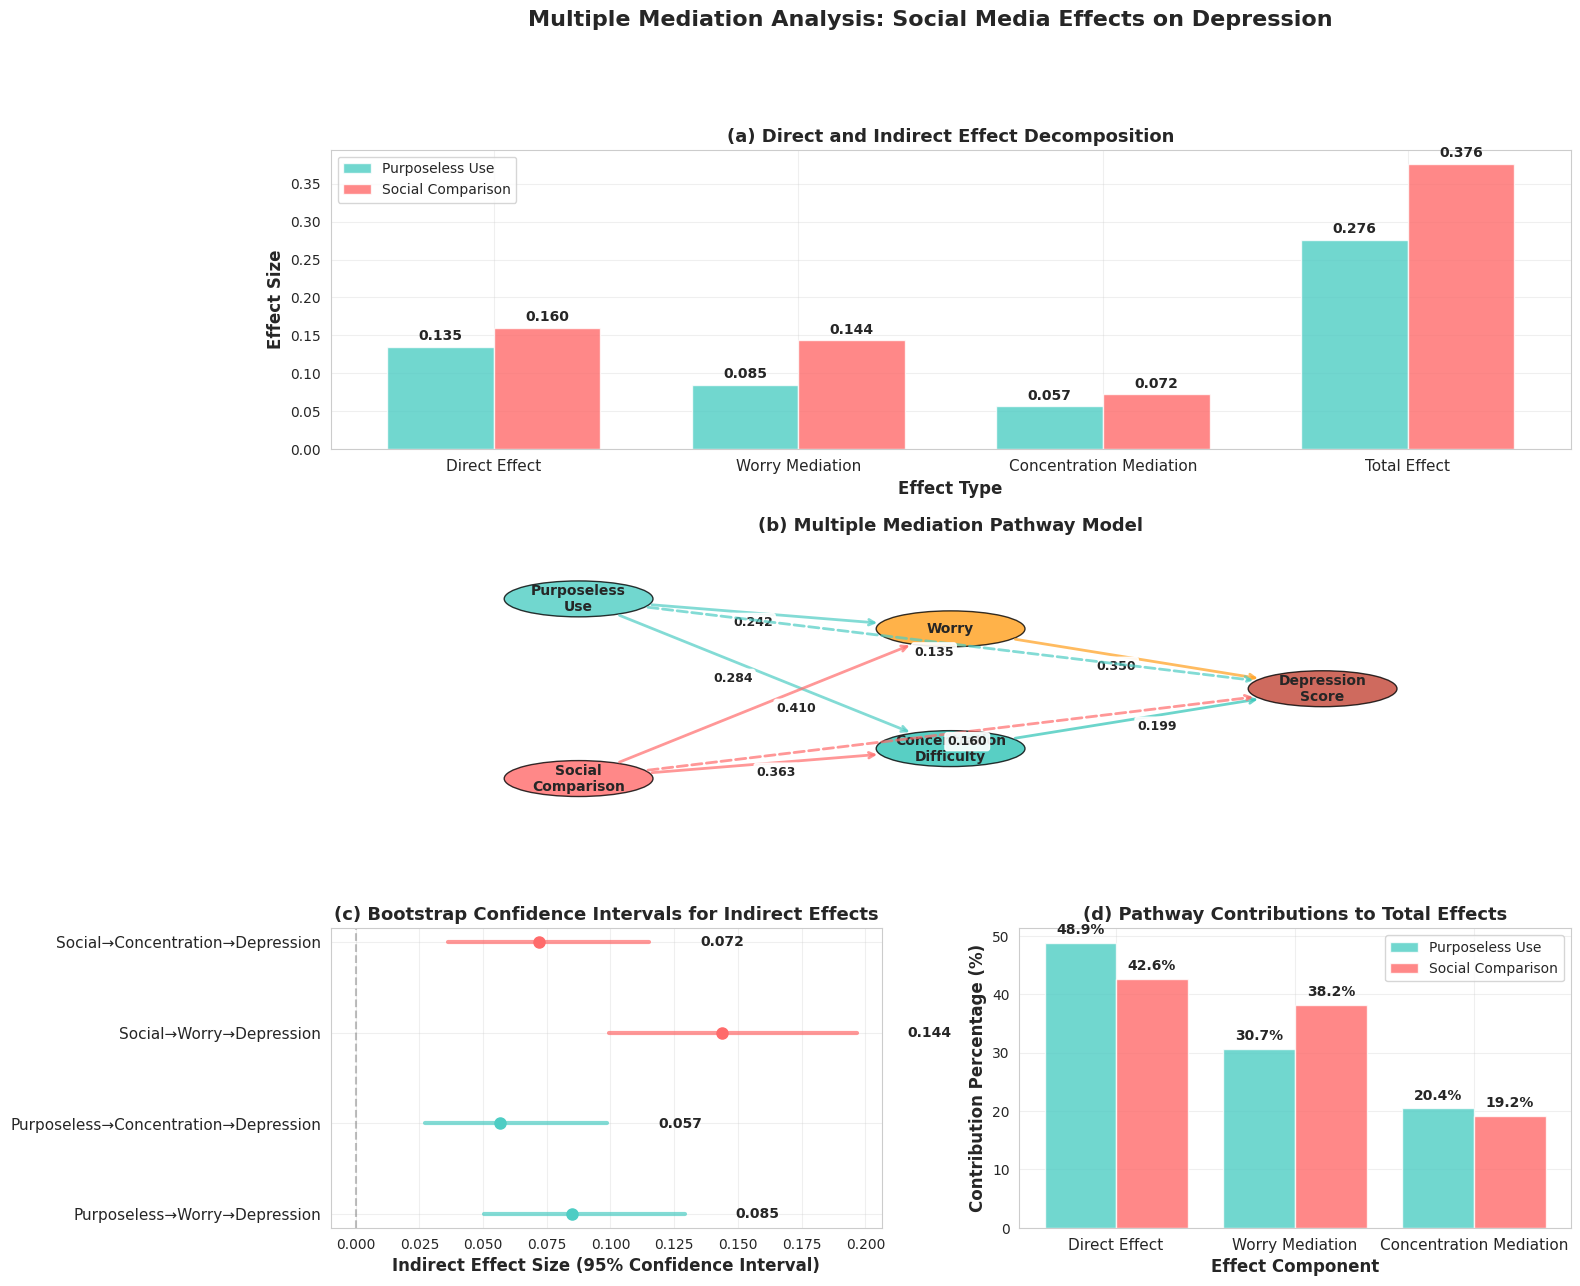

In [43]:
# Create figure with 3-row layout
fig = plt.figure(figsize=(16, 14))
# Create a 3x2 grid: row1 for a, row2 for b, row3 for c and d
gs = gridspec.GridSpec(3, 2, figure=fig, hspace=0.3, wspace=0.25)

# Data preparation - based on your mediation analysis results
# Purposeless Use model
purposeless_direct = 0.1350
purposeless_indirect_worry = 0.0848
purposeless_indirect_concentration = 0.0565
purposeless_total = purposeless_direct + purposeless_indirect_worry + purposeless_indirect_concentration

# Social Comparison model
social_direct = 0.1603
social_indirect_worry = 0.1436
social_indirect_concentration = 0.0721
social_total = social_direct + social_indirect_worry + social_indirect_concentration

# Row 1: Effect decomposition chart (a)
ax1 = fig.add_subplot(gs[0, :])  # Span both columns in first row

# Prepare data
categories = ['Direct Effect', 'Worry Mediation', 'Concentration Mediation', 'Total Effect']
purposeless_values = [purposeless_direct, purposeless_indirect_worry, 
                     purposeless_indirect_concentration, purposeless_total]
social_values = [social_direct, social_indirect_worry, 
                social_indirect_concentration, social_total]

x = np.arange(len(categories))
width = 0.35

bars1 = ax1.bar(x - width/2, purposeless_values, width, 
                label='Purposeless Use', color='#4ECDC4', alpha=0.8)
bars2 = ax1.bar(x + width/2, social_values, width, 
                label='Social Comparison', color='#FF6B6B', alpha=0.8)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.005,
                 f'{height:.3f}', ha='center', va='bottom', 
                 fontsize=10, fontweight='bold')

ax1.set_xlabel('Effect Type', fontsize=12, fontweight='bold')
ax1.set_ylabel('Effect Size', fontsize=12, fontweight='bold')
ax1.set_title('(a) Direct and Indirect Effect Decomposition', fontsize=13, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(categories, fontsize=11)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Row 2: Mediation pathway diagram (b) - centered
ax2 = fig.add_subplot(gs[1, :])  # Span both columns in second row
ax2.set_xlim(0, 10)
ax2.set_ylim(0, 10)
ax2.axis('off')
ax2.set_title('(b) Multiple Mediation Pathway Model', fontsize=13, fontweight='bold')

# Define node positions
nodes = {
    "Purposeless\nUse": (2, 8),
    "Social\nComparison": (2, 2),
    "Worry": (5, 7),
    "Concentration\nDifficulty": (5, 3),
    "Depression\nScore": (8, 5)
}

# Draw nodes
node_colors = {
    "Purposeless\nUse": '#4ECDC4',
    "Social\nComparison": '#FF6B6B', 
    "Worry": '#FF9F1C',
    "Concentration\nDifficulty": '#2EC4B6',
    "Depression\nScore": '#C44536'
}

for node, (x, y) in nodes.items():
    circle = patches.Circle((x, y), 0.6, color=node_colors[node], alpha=0.8, ec='black')
    ax2.add_patch(circle)
    ax2.text(x, y, node, ha='center', va='center', fontsize=10, fontweight='bold')

# Draw paths
paths = [
    # a paths (X → M)
    ("Purposeless\nUse", "Worry", 0.2422, "#4ECDC4"),
    ("Purposeless\nUse", "Concentration\nDifficulty", 0.2840, "#4ECDC4"),
    ("Social\nComparison", "Worry", 0.4100, "#FF6B6B"),
    ("Social\nComparison", "Concentration\nDifficulty", 0.3628, "#FF6B6B"),
    
    # b paths (M → Y)
    ("Worry", "Depression\nScore", 0.3502, "#FF9F1C"),
    ("Concentration\nDifficulty", "Depression\nScore", 0.1988, "#2EC4B6"),
    
    # c' paths (X → Y, direct effects)
    ("Purposeless\nUse", "Depression\nScore", 0.1350, "#4ECDC4", "--"),
    ("Social\nComparison", "Depression\nScore", 0.1603, "#FF6B6B", "--")
]

for path in paths:
    if len(path) == 5:  # Direct effects, dashed line
        start, end, coef, color, linestyle = path
    else:  # Indirect effects, solid line
        start, end, coef, color = path
        linestyle = "-"
    
    x1, y1 = nodes[start]
    x2, y2 = nodes[end]
    
    # Calculate arrow direction
    dx, dy = x2 - x1, y2 - y1
    dist = np.sqrt(dx*dx + dy*dy)
    dx, dy = dx/dist, dy/dist
    
    # Adjust start and end points to node edges
    x1, y1 = x1 + dx*0.6, y1 + dy*0.6
    x2, y2 = x2 - dx*0.6, y2 - dy*0.6
    
    # Draw arrow
    ax2.annotate('', xy=(x2, y2), xytext=(x1, y1),
                arrowprops=dict(arrowstyle='->', color=color, 
                               linestyle=linestyle, linewidth=2, alpha=0.7))
    
    # Add coefficient labels
    mid_x, mid_y = (x1+x2)/2, (y1+y2)/2
    # Slightly offset to avoid overlapping with arrows
    offset_x, offset_y = dy*0.3, -dx*0.3  # Offset perpendicular to arrow direction
    
    ax2.text(mid_x + offset_x, mid_y + offset_y, f'{coef:.3f}', 
             ha='center', va='center', fontsize=9, fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.2", facecolor='white', alpha=0.9))

# Row 3: Forest plot (c) and Contribution percentages (d)
ax3 = fig.add_subplot(gs[2, 0])  # Left column in third row

# Prepare data for forest plot
effects = [
    'Purposeless→Worry→Depression',
    'Purposeless→Concentration→Depression', 
    'Social→Worry→Depression',
    'Social→Concentration→Depression'
]

effect_sizes = [0.0848, 0.0565, 0.1436, 0.0721]
ci_lower = [0.0503, 0.0274, 0.0996, 0.0361]
ci_upper = [0.1292, 0.0986, 0.1966, 0.1152]

y_pos = np.arange(len(effects))
colors = ['#4ECDC4', '#4ECDC4', '#FF6B6B', '#FF6B6B']

# Draw confidence intervals and effect points
for i, (effect, lower, upper) in enumerate(zip(effect_sizes, ci_lower, ci_upper)):
    # Draw confidence interval line
    ax3.plot([lower, upper], [i, i], color=colors[i], linewidth=3, alpha=0.7)
    # Draw effect point
    ax3.plot(effect, i, 'o', color=colors[i], markersize=8)
    # Add effect value label
    ax3.text(upper + 0.02, i, f'{effect:.3f}', va='center', 
             fontsize=10, fontweight='bold')

# Add zero reference line
ax3.axvline(x=0, color='gray', linestyle='--', alpha=0.5)

ax3.set_yticks(y_pos)
ax3.set_yticklabels(effects, fontsize=11)
ax3.set_xlabel('Indirect Effect Size (95% Confidence Interval)', fontsize=12, fontweight='bold')
ax3.set_title('(c) Bootstrap Confidence Intervals for Indirect Effects', fontsize=13, fontweight='bold')
ax3.grid(True, alpha=0.3)

# Row 3: Effect contribution percentages (d)
ax4 = fig.add_subplot(gs[2, 1])  # Right column in third row

# Calculate contribution percentages for each pathway
purposeless_contributions = [
    purposeless_direct/purposeless_total * 100,
    purposeless_indirect_worry/purposeless_total * 100,
    purposeless_indirect_concentration/purposeless_total * 100
]

social_contributions = [
    social_direct/social_total * 100,
    social_indirect_worry/social_total * 100,
    social_indirect_concentration/social_total * 100
]

components = ['Direct Effect', 'Worry Mediation', 'Concentration Mediation']
x = np.arange(len(components))

bars1 = ax4.bar(x - 0.2, purposeless_contributions, 0.4, 
                label='Purposeless Use', color='#4ECDC4', alpha=0.8)
bars2 = ax4.bar(x + 0.2, social_contributions, 0.4, 
                label='Social Comparison', color='#FF6B6B', alpha=0.8)

# Add percentage labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height + 1,
                 f'{height:.1f}%', ha='center', va='bottom', 
                 fontsize=10, fontweight='bold')

ax4.set_xlabel('Effect Component', fontsize=12, fontweight='bold')
ax4.set_ylabel('Contribution Percentage (%)', fontsize=12, fontweight='bold')
ax4.set_title('(d) Pathway Contributions to Total Effects', fontsize=13, fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels(components, fontsize=11)
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3)

# Add overall title
plt.suptitle('Multiple Mediation Analysis: Social Media Effects on Depression', 
             fontsize=16, fontweight='bold', y=0.98)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('mediation_analysis_3row_layout.png', dpi=300, bbox_inches='tight')
plt.show()